# AirBnB Dataset Prediction

Testing linear regression (and 1 other algorithm) for predicting price of an AirBnB listing based on various features such as amenities, location and other factors.

The dataset used is from https://insideairbnb.com/get-the-data/. Credits to author.

1 main city will be chosen for analysis, **London, UK**.

**What the Dataset Columns Entail**

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596

In [138]:
# AIRBNB PRICE PREDICTION ANALYSIS
import os

cwd = os.getcwd()
print(cwd)

c:\Users\avera\OneDrive\Documents\uni\uni shit\y2\Sem 2\INF2008 MachineLearning\MLBB


In [139]:
# move the Airbnb Dataset .gzip file to /content after downloading it at the website
import gzip
import shutil

# download the gzip file from the link above

compressed_name = 'london.csv.gz' # what ever name you choose for the gzip file
file_name = 'listings.csv'

with gzip.open(compressed_name, 'rb') as f_in:
    with open(file_name, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

The name of the file will be *listings.csv*

# 1. Data Cleaning and Preprocessing
Clean the data and analyse the features for the most relevant data to be fed to the model

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show the three rows
# df = pd.read_csv('/content/listings.csv')
df = pd.read_csv('listings.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,https://www.airbnb.com/rooms/56229,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (1),NaN,NaN,https://a0.muscache.com/pictures/3860587/79e73...,216660,...,4.79,4.92,4.71,NaN,f,11,9,1,0,0.84
1,62970,https://www.airbnb.com/rooms/62970,20241211032909,2024-12-12,city scrape,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,The neighbourhood is fantastic with Brick Lane...,https://a0.muscache.com/pictures/prohost-api/H...,336059,...,4.74,4.63,4.51,NaN,t,1,1,0,0,1.05
2,63948,https://www.airbnb.com/rooms/63948,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (4),NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,216660,...,4.78,4.91,4.60,NaN,f,11,9,1,0,1.06


In [141]:
# View the columns to see what's available in the dataset
print(df.columns)
print(len(df.columns))

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [142]:
# view what data types exists in the dataset
# brief overview (uncomment to see)
# df.dtypes

# detailed overview
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95144 non-null  int64  
 1   listing_url                                   95144 non-null  object 
 2   scrape_id                                     95144 non-null  int64  
 3   last_scraped                                  95144 non-null  object 
 4   source                                        95144 non-null  object 
 5   name                                          95144 non-null  object 
 6   description                                   92196 non-null  object 
 7   neighborhood_overview                         43463 non-null  object 
 8   picture_url                                   95134 non-null  object 
 9   host_id                                       95144 non-null 

In [143]:
# How many rows are there before cleaning
df.shape[0]

95144

In [144]:
# Determine if there are null values within the dataset
# isnull.().sum(axis=0) does not show everything
# df.isnull().sum(axis=0)

# rather than check everything, just view what columns have null values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Filter only columns with nulls
print(null_counts)

description                      2948
neighborhood_overview           51681
picture_url                        10
host_name                           7
host_since                          7
host_location                   22233
host_about                      46792
host_response_time              32435
host_response_rate              32435
host_acceptance_rate            27256
host_is_superhost                1748
host_thumbnail_url                  7
host_picture_url                    7
host_neighbourhood              48827
host_listings_count                 7
host_total_listings_count           7
host_verifications                  7
host_has_profile_pic                7
host_identity_verified              7
neighbourhood                   51680
neighbourhood_group_cleansed    95144
bathrooms                       32400
bathrooms_text                    156
bedrooms                        12350
beds                            32454
price                           32367
minimum_mini

We need to drop any unnecessary information that is not relevant to price calculation.

We can start first with any irrelevant data that has no impact on price calculation whatsoever.

We want to ensure these columns remain :

**Property & Listing Attributes**

* property_type (Different types have different pricing, e.g., "Apartment" vs. "Villa")
* room_type (Entire home/apt vs. private room affects price)
* accommodates (More guests usually means higher price)
* bathrooms_text (Number of bathrooms affects price)
* bedrooms (More bedrooms typically increase price)
* beds (More beds can increase listing value)
* amenities (Luxury amenities like pools, WiFi, and AC may increase price)


**Location**
* latitude / longitude (Can be used to extract geo-based price trends)

**Host Information** (If Significant)
* host_is_superhost (Superhosts may charge higher prices)
* host_listings_count / host_total_listings_count (Professional hosts vs. casual hosts may price differently)
* host_identity_verified (Could be a trust factor affecting pricing)
Availability & Minimum Nights
* minimum_nights (Longer stays could impact price)
* availability_30, availability_60, availability_90, availability_365 (More * * availability may suggest demand or pricing trends)

**Reviews & Ratings**
* number_of_reviews (More reviews may indicate demand)
* review_scores_rating (Higher ratings may allow higher prices)
* reviews_per_month (Shows frequency of bookings, indicating demand)

Edit as necessary*

In [145]:
# List of columns to drop
drop_columns = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
    'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_neighbourhood',
    'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
    'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review',
    'neighbourhood', 'neighborhood_overview', 'neighbourhood_group_cleansed', 'license', 'picture_url', 'host_id',
    'maximum_nights_avg_ntm', 'has_availability', 'calendar_last_scraped',
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review',
    'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'
]

# double check this
# columns to consider scrutizing
# superhost? description? (no desc, less lightly to be bought)

# Drop columns
df_cleaned = df.drop(columns=drop_columns)

In [146]:
# this is the new cleaned dataset
df_cleaned.head()

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,Cosy Double studio in Zone 2 Hammersmith (1),NaN,within a day,99%,95%,f,t,Hammersmith and Fulham,51.49392,-0.22754,...,145,4.71,4.71,4.67,4.88,4.79,4.92,4.71,f,0.84
1,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,within a few hours,100%,100%,NaN,t,Tower Hamlets,51.52435,-0.06938,...,178,4.52,4.64,4.60,4.80,4.74,4.63,4.51,t,1.05
2,Cosy Double studio in Zone 2 Hammersmith (4),NaN,within a day,99%,95%,f,t,Hammersmith and Fulham,51.49547,-0.22864,...,170,4.61,4.62,4.69,4.87,4.78,4.91,4.60,f,1.06
3,Cosy Double studio in Zone 2 Hammersmith (3),NaN,within a day,99%,95%,f,t,Hammersmith and Fulham,51.49368,-0.22774,...,186,4.65,4.76,4.76,4.87,4.77,4.92,4.67,f,1.10
4,Spacious single room in quiet flat,NaN,NaN,NaN,NaN,f,t,Haringey,51.59031,-0.09408,...,13,4.46,4.69,4.77,4.62,4.85,4.62,4.23,f,0.09


In [147]:
# check for remaining missing values in the columns
df_cleaned.isnull().sum()

name                               0
description                     2948
host_response_time             32435
host_response_rate             32435
host_acceptance_rate           27256
host_is_superhost               1748
host_identity_verified             7
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                      32400
bathrooms_text                   156
bedrooms                       12350
beds                           32454
amenities                          0
price                          32367
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             2
maximum_minimum_nights             2
minimum_maximum_nights             2
maximum_maximum_nights             2
minimum_nights_avg_ntm             2
availability_30                    0
a

In [148]:
# Drop the rows with empty fields
# some empty is fine, but need to consider the following : price, bedrooms, bathroom
df_cleaned = df_cleaned.dropna()

In [149]:
# check how much we are left with and ensure that there are no more field empty within the dataset
print(df_cleaned.isnull().sum())
print(df_cleaned.shape[0])

name                           0
description                    0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_

In [150]:
# view how many unique object exists in each column
include = ['object', 'float', 'int']
df_cleaned.describe(include=include)

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
count,42073,42073,42073,42073,42073,42073,42073,42073,42073.000000,42073.000000,...,42073.000000,42073.000000,42073.000000,42073.000000,42073.000000,42073.000000,42073.000000,42073.000000,42073,42073.000000
unique,40977,37286,4,86,101,2,2,33,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,"Letzi private en-suite, North Harrow.",Enjoy a stylish experience at this centrally-l...,within an hour,100%,100%,f,t,Westminster,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
freq,12,166,30007,30929,14689,28971,39430,5658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26729,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.509870,-0.131133,...,33.063960,4.684274,4.719754,4.667382,4.782180,4.807087,4.733892,4.599854,NaN,1.390503
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048159,0.101795,...,61.597221,0.474926,0.457097,0.477379,0.420214,0.409820,0.382829,0.496202,NaN,1.482251
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.295937,-0.496075,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.010000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.486539,-0.190952,...,4.000000,4.580000,4.660000,4.550000,4.750000,4.790000,4.650000,4.500000,NaN,0.400000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.513628,-0.132192,...,12.000000,4.820000,4.860000,4.810000,4.910000,4.950000,4.830000,4.720000,NaN,0.930000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.537086,-0.072240,...,35.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,NaN,1.880000


Since we are predicting the price, we have to convert the data type of the price column to a readable one

In [151]:
# parse the price column into readable float
df_cleaned['price'] = df_cleaned['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [152]:
df_cleaned.price.head()

6     120.0
8      40.0
12     83.0
13    300.0
14     70.0
Name: price, dtype: float64

**Feature Cleaning**

As a huge portion of the data is categorical in nature, we can use one hot encoding (https://www.kaggle.com/code/dansbecker/using-categorical-data-with-one-hot-encoding) to cateorize if an entry has *x* or *y* property or none at all.

The next sections will be dealing with processing with columns that are categorical so as to allow the model to better understand the relationship of each feature and how it correlates to the prediction of the price.



## 1.1 Price analysis

Before analysing the other features, we can start with the actual prices available first.

We can plot out the range of prices available, the mean of price of all legitimate listings, the highest and lowest among other comparisons.

In [153]:
print("Number of listing") # Double checking
print(df_cleaned.price.count())
print("Mean price of all listings:")
print(df_cleaned.price.mean())
print("Highest price of all listings:")
print(df_cleaned.price.max())
print("Lowest price of all listings:")
print(df_cleaned.price.min())
print("Median price of all listings:")
print(df_cleaned.price.median())

Number of listing
42073
Mean price of all listings:
190.16930097687353
Highest price of all listings:
80000.0
Lowest price of all listings:
1.0
Median price of all listings:
130.0


There might be a necessity to remove outliers. Feel free to discuss and determine if required.

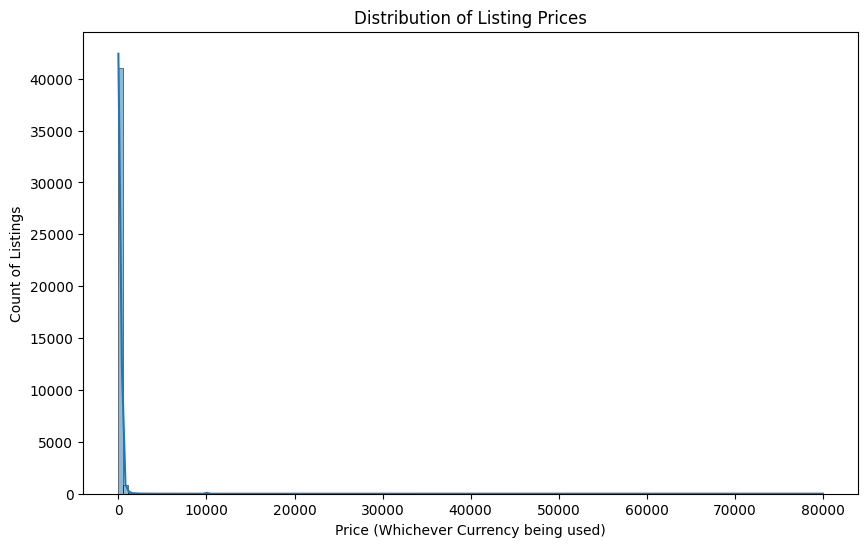

In [154]:
# plot the price range in histogram for seeing price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=140, kde=True)
plt.xlabel("Price (Whichever Currency being used)")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listing Prices")
plt.show()

Due to massive outliers in the price, its hard to see the actual distribution in price, we have to use other methods to see the proper distribution.

It might be good practice to remove the high percentile listings as their values might be skewing the data heavily.

In [155]:
# Removing high percentile outliers
# Define a reasonable threshold (e.g., 99th percentile)
price_threshold = np.percentile(df_cleaned["price"], 95)

# Filter data
# Comment/Uncomment out the df_filtered line if you want to separate 2 datasets
# 1 with all the listings, 1 with the top 5% percentile listings based on price removed.
# df_filtered = df_cleaned[df_cleaned["price"] <= price_threshold] # Comment/Uncomment accordingly
df_cleaned = df_cleaned[df_cleaned["price"] <= price_threshold]
print(df_cleaned.shape[0])
# print(df_filtered.shape[0]) # Comment/Uncomment accordingly

39970


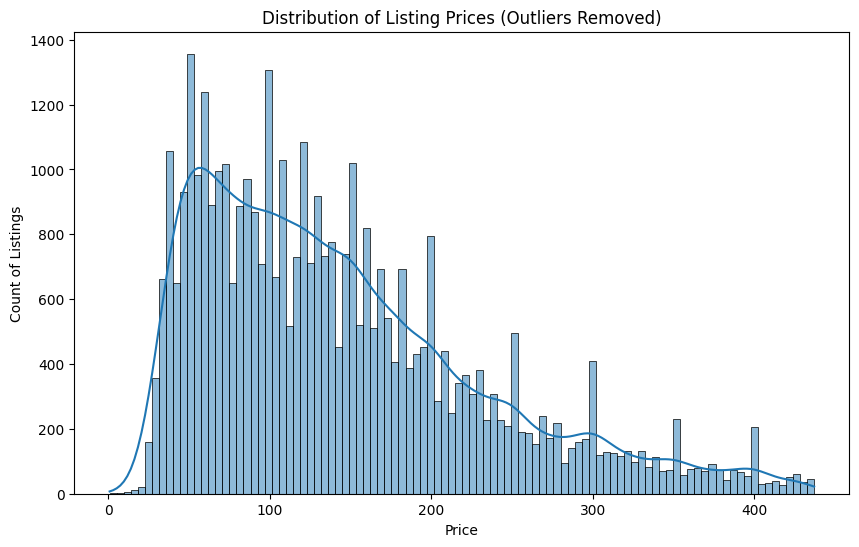

In [156]:
# Replot
plt.figure(figsize=(10, 6))
# sns.histplot(df_filtered["price"], bins=100, kde=True) # Comment/Uncomment accordingy
sns.histplot(df_cleaned["price"], bins=100, kde=True) # Uncomment this to run the filtered base dataset, if the the outlier was removed
plt.xlabel("Price")
plt.ylabel("Count of Listings")
plt.title("Distribution of Listing Prices (Outliers Removed)")
plt.show()

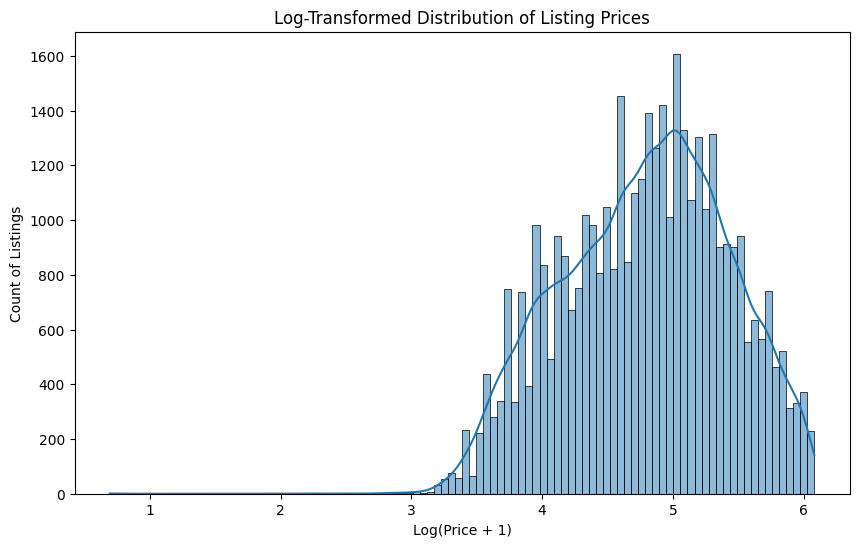

In [157]:
# Log transformation post filtered
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_cleaned["price"]), bins=100, kde=True)  # log1p avoids log(0)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count of Listings")
plt.title("Log-Transformed Distribution of Listing Prices")
plt.show()

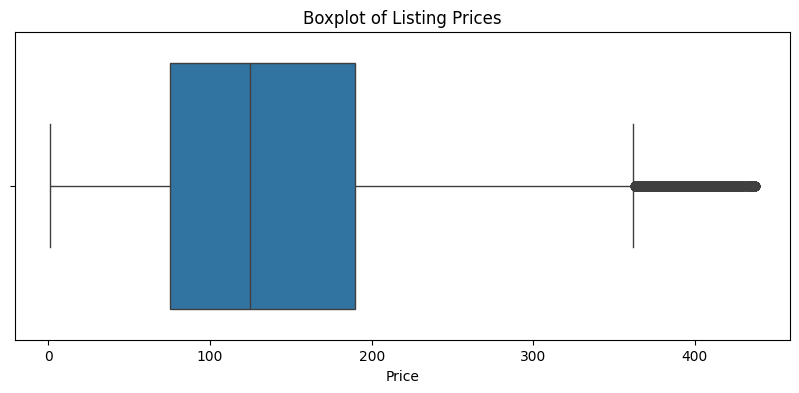

In [158]:
# Boxplot to see outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned["price"])
plt.xlabel("Price")
plt.title("Boxplot of Listing Prices")
plt.show()

As we can the majority of the distribution lies in the area between 100~200 range. 

If the outlier was not removed, then the outlier at the far right should be around 400+ range. We can adjust accordingly as we proceeed to determine if we need the outliers.

For fair analysis, it might be good to remove the outliers, as it may skew the numbers greatly. We can do so at the end processing and data engineering for easier splitting.

## 1.2 Property & Physical Attributes

The next few sections will be dedicated for processing the features of the physical atributes of the AirBnB listings.

### 1.2.1 Cleaning of Physical Attributes Features

Each features must be scrutinized and cleaned to be fitted into the model. Amenities, room types, bathroom and bedrooms and then price.

**Amenities**

We will first start of with amenities as an example.

We need to one-hot encoding for all the amenities listed within the given amenity column.

The format of the amenities is listed as an array i.e.

[ "Hangers", "Wi-Fi", ... "etc" ]

In [159]:
# need to start fitting the data for a correlation map
# get the unique values for all the amenities
# and encode them for fitting
import ast

df_cleaned['amenities'] = df_cleaned['amenities'].apply(ast.literal_eval)

# Get all unique amenities
unique_amenities = set()
df_cleaned['amenities'].apply(lambda x: unique_amenities.update(x))  # Flatten all amenities

# Convert to sorted list for readability
unique_amenities = sorted(unique_amenities)

# Display all unique amenities
print(unique_amenities)

[' AEG stainless steel oven', ' Bluetooth speaker available and Bluetooth speakers in garden  Bluetooth sound system', ' Bosch stainless steel double oven', ' Bosch stainless steel stove', ' Bose  sound system with Bluetooth and aux', ' Gilchrist Soames  body soap', ' Gilchrist Soames  conditioner', ' Gilchrist Soames  shampoo', ' Gilchrist and Soames body soap', ' Gilchrist and Soames conditioner', ' Gilchrist and Soames shampoo', ' Herbal conditioner', ' Radox 2 in 1 Shower gel and Shampoo  shampoo', ' Various  conditioner', ' bertazzoni stainless steel oven', ' ‘Ruark’ deluxe Bluetooth radio Bluetooth sound system', '"portable stove" electric stove', '"portable stove" stove', '& ice box refrigerator', '(No freezer) refrigerator', '(only short stay, less than 1 week) body soap', '(only short stay, less than 1 week) conditioner', '(only short stay, less than 1 week) shampoo', '(various) conditioner', '- body soap', '- conditioner', '- electric stove', '- refrigerator', '- stainless st

The sheer number of unique amenity values means that one-hot encoding will result in too much columns for amenities, resulting in overfitting.

To fix this, we need to categorise the amenities into broad categories to ensure reliable prediction.

In [160]:

# Define categorized amenities
wifi_amenities = {"Wifi", "Wi-Fi", "Ethernet connection", "無線lan", "ワイヤレスインターネット"}
kitchen_amenities = {"Kitchen", "Microwave", "Refrigerator", "Stove", "Oven", "BBQ grill", "Coffee maker", "Dining table"}
parking_amenities = {"Parking", "Garage", "EV charger", "free parking", "paid parking", "carport"}
pool_amenities = {"Pool", "Swimming pool", "Hot tub"}
air_conditioning_amenities = {"Air conditioning", "Heating", "Ceiling fan", "Indoor Fireplace"}
security_amenities = {"Smoke alarm", "Fire extinguisher", "Carbon monoxide alarm"}
laundry_amenities = {"Washer", "Dryer", "Iron", "Clothing storage", "Housekeeping"}
bathroom_amenities = {"Bathtub", "Bidet", "Hot water", "Body Soap", "Shampoo", "Conditioner"}
entertainment_amenities = {"TV", "HDTV", "Sound System", "Game console", "Streaming services"}
fitness_amenities = {"Exercise equipment", "Gym"}
child_friendly_amenities = {"Baby Monitor", "Baby bath", "High chair", "Crib", "Children’s books and toys"}
outdoor_amenities = {"Backyard", "BBQ grill"}
elevator_amenities = {"Elevator"}

# Combine all categories into one dictionary
all_amenities = {
    "has_wifi": wifi_amenities,
    "has_kitchen": kitchen_amenities,
    "has_parking": parking_amenities,
    "has_pool": pool_amenities,
    "has_air_conditioning": air_conditioning_amenities,
    "has_security": security_amenities,
    "has_laundry": laundry_amenities,
    "has_bathroom": bathroom_amenities,
    "has_entertainment": entertainment_amenities,
    "has_fitness": fitness_amenities,
    "has_child_friendly": child_friendly_amenities,
    "has_outdoor": outdoor_amenities,
    "has_elevator": elevator_amenities,
}

# Convert amenity strings into lists
df_cleaned['amenities'] = df_cleaned['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Apply category checks: True if any of the category amenities are in the listing
for column, category_set in all_amenities.items():
    df_cleaned[column] = df_cleaned['amenities'].apply(lambda x: any(item in category_set for item in x) if isinstance(x, list) else False)

# Also create columns for each **individual** amenity
for category_set in all_amenities.values():
    for amenity in category_set:
        col_name = f"has_{amenity.lower().replace(' ', '_')}"  # Normalize column name
        df_cleaned[col_name] = df_cleaned['amenities'].apply(lambda x: amenity in x if isinstance(x, list) else False)

print(df_cleaned.columns)

Index(['name', 'description', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude',
       ...
       'has_tv', 'has_sound_system', 'has_exercise_equipment', 'has_gym',
       'has_high_chair', 'has_baby_monitor', 'has_crib', 'has_baby_bath',
       'has_children’s_books_and_toys', 'has_backyard'],
      dtype='object', length=101)


Some of the amenity classification has 0 listings, rendering it moot, so just drop them.

Should drop them if all listings have said amenity, as it would be meaningless to classify.

In [161]:
# check how many listings has
for amenity in df_cleaned.columns:
    if amenity.startswith('has_'):
        print(f"{amenity}: {df_cleaned[amenity].sum()} listings have this")
        if (df_cleaned[amenity].sum() == 0 or df_cleaned[amenity].sum() == df_cleaned.shape[0]):
            df_cleaned = df_cleaned.drop(columns=[amenity])
            print(f"Dropping {amenity}")


has_wifi: 36634 listings have this
has_kitchen: 36002 listings have this
has_parking: 0 listings have this
Dropping has_parking
has_pool: 107 listings have this
has_air_conditioning: 2646 listings have this
has_security: 38251 listings have this
has_laundry: 37710 listings have this
has_bathroom: 35889 listings have this
has_entertainment: 23766 listings have this
has_fitness: 1819 listings have this
has_child_friendly: 5288 listings have this
has_outdoor: 5729 listings have this
has_elevator: 7057 listings have this
has_無線lan: 0 listings have this
Dropping has_無線lan
has_wi-fi: 0 listings have this
Dropping has_wi-fi
has_ワイヤレスインターネット: 0 listings have this
Dropping has_ワイヤレスインターネット
has_ethernet_connection: 4114 listings have this
has_bbq_grill: 2547 listings have this
has_microwave: 26366 listings have this
has_refrigerator: 28856 listings have this
has_dining_table: 20072 listings have this
has_stove: 14549 listings have this
has_oven: 20277 listings have this
has_coffee_maker: 9666 li

In [162]:
# Final amenity list
df_cleaned.columns.tolist()

['name',
 'description',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'reviews_per_month',
 'has_wifi',
 'has_kitchen',
 'has_pool',
 'has_air_conditioning',
 'has_security',
 'has_laundry',
 'has_bathroom',
 'has_entertainment',
 'has_fitness',
 'has_ch

Now we have the other unique values to process. This includes :

* property_type
* room_type
* bathrooms
* bathrooms_type
* bedrooms
* bedrooms_type
* accomodates

Other variables can be accounted for being used as factors, the aforementioned should be prioritised


**Room Type / Property Type**

Next will be the *room_type* and *property_type* of each listing.


In [163]:
# Each value listed is shown to be either shared or private.
df_cleaned['property_type'].unique()

array(['Entire condo', 'Private room in home', 'Entire home',
       'Private room in rental unit', 'Entire rental unit',
       'Entire townhouse', 'Private room in townhouse',
       'Entire serviced apartment', 'Private room in loft',
       'Private room in condo', 'Entire guest suite', 'Houseboat',
       'Private room in bed and breakfast', 'Entire loft', 'Entire cabin',
       'Entire guesthouse', 'Private room in bungalow',
       'Private room in guest suite', 'Private room in guesthouse',
       'Shared room in condo', 'Entire cottage', 'Tiny home',
       'Private room in cottage', 'Private room in villa',
       'Private room in houseboat', 'Entire place', 'Room in aparthotel',
       'Room in hotel', 'Entire bungalow', 'Room in bed and breakfast',
       'Room in boutique hotel', 'Private room',
       'Private room in serviced apartment', 'Entire vacation home',
       'Boat', 'Shared room in home', 'Room in serviced apartment',
       'Earthen home', 'Private room in hos

In [164]:
# This column is more consistent in its categorisation
df_cleaned['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

Between the 2, it better to use room_type as a better baseline comparison to avoid complicating these features.

We can drop *property_type* as a result, and just one-hot encode *room_type*.

In [165]:
# get rid of property type
df_cleaned = df_cleaned.drop(columns=['property_type'])

In [166]:
# and one-hot encode the room types
df_cleaned = pd.get_dummies(df_cleaned, columns=['room_type'], prefix=['room_type'])  # One-hot encode room_type
df_cleaned.columns

Index(['name', 'description', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'has_wifi', 'has_kitchen', 'has_pool', 'has_air_conditioning',
       'has_security', 'has_laundry', 'has_bathroom', 'has_entertainment',
    

In [167]:
df_cleaned.head(3)

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,has_gym,has_high_chair,has_crib,has_baby_bath,has_children’s_books_and_toys,has_backyard,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
6,2 bed/2 bath luxury flat with city view!,The apartment is on the top floor of a portere...,within an hour,100%,100%,f,t,Lambeth,51.46156,-0.11183,...,False,False,False,False,False,False,True,False,False,False
8,Bright single room in family home.,"Small, bright, single room in family home, ove...",within a few hours,100%,0%,f,t,Southwark,51.46478,-0.08007,...,False,False,False,False,False,False,False,False,True,False
12,Gorgeous double at Camden Market,This fine property in the heart of Camden Town...,within an hour,100%,79%,t,t,Camden,51.54417,-0.14651,...,False,False,True,False,False,False,False,False,True,False


**Bathrooms / Bathrooms Text**

Next will be the bathroom features *bathrooms* and *bathroom_text*. Similar to room and property features, we are going to focus on the *bathrooms* value only as it is already standardized.

The unique values will still be shown in case anyone wants to make use of the unique values in *bathroom_text*.

In [168]:
print("Unique numbers of bathrooms:\n")
print(df_cleaned.bathrooms.unique())
print(df_cleaned.bathrooms.value_counts())
print("\nUnique bathroom types in bathroom_text:\n")
print(df_cleaned.bathrooms_text.unique())
print(df_cleaned.bathrooms_text.value_counts())

Unique numbers of bathrooms:

[ 2.   1.   1.5  0.   2.5  3.   4.   3.5  0.5  4.5 10.   5.  16.   6.
  5.5  9. ]
bathrooms
1.0     27664
2.0      5633
1.5      4129
2.5      1093
3.0       649
0.5       322
0.0       186
3.5       182
4.0        53
4.5        19
5.0        16
10.0       11
6.0         7
5.5         3
9.0         2
16.0        1
Name: count, dtype: int64

Unique bathroom types in bathroom_text:

['2 baths' '1 shared bath' '1.5 shared baths' '1 bath' '1.5 baths'
 '0 baths' '1 private bath' '2.5 baths' '3 shared baths' '4 baths'
 '2.5 shared baths' '3 baths' '2 shared baths' '3.5 baths'
 '0 shared baths' 'Half-bath' 'Shared half-bath' '4.5 baths'
 '3.5 shared baths' '4 shared baths' 'Private half-bath' '10 shared baths'
 '5 baths' '10 baths' '16 baths' '6 baths' '5.5 shared baths' '9 baths'
 '5.5 baths' '4.5 shared baths' '6 shared baths' '5 shared baths']
bathrooms_text
1 bath               19660
2 baths               4907
1 shared bath         4506
1 private bath        

In [169]:
# drop bathroom_text for now, only normalise bathrooms if need to
df_cleaned = df_cleaned.drop(columns=['bathrooms_text'])
df_cleaned.head(3)

,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,has_gym,has_high_chair,has_crib,has_baby_bath,has_children’s_books_and_toys,has_backyard,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
6,2 bed/2 bath luxury flat with city view!,The apartment is on the top floor of a portere...,within an hour,100%,100%,f,t,Lambeth,51.46156,-0.11183,...,False,False,False,False,False,False,True,False,False,False
8,Bright single room in family home.,"Small, bright, single room in family home, ove...",within a few hours,100%,0%,f,t,Southwark,51.46478,-0.08007,...,False,False,False,False,False,False,False,False,True,False
12,Gorgeous double at Camden Market,This fine property in the heart of Camden Town...,within an hour,100%,79%,t,t,Camden,51.54417,-0.14651,...,False,False,True,False,False,False,False,False,True,False


There's a listing with 16 baths listed.

In [170]:
bath_16 = df_cleaned.loc[df_cleaned['bathrooms'] > 10]
print(bath_16['price'])

33683    200.0
Name: price, dtype: float64


This might skew the pricing, but we can leave it in first; We have no real way to tell if bathrooms really have a strong correlation with price.

**Bedrooms / Beds**

Any AirBnB should have beds and bedrooms, but apparently there might be some with 0 beds and bedrooms.

There's no need to clean these values at the moment, so we can leave them be.

In [171]:
print("Unique count of bedrooms:\n")
print(df_cleaned.bedrooms.unique())
print(df_cleaned.bedrooms.value_counts())
print("\nUnique count of beds:\n")
print(df_cleaned.beds.unique())
print(df_cleaned.beds.value_counts())

Unique count of bedrooms:

[ 2.  1.  3.  4.  0.  7.  5.  6.  9. 16. 10.  8.]
bedrooms
1.0     25049
2.0      9177
3.0      2865
0.0      1690
4.0       900
5.0       211
6.0        54
7.0        15
16.0        3
8.0         3
9.0         2
10.0        1
Name: count, dtype: int64

Unique count of beds:

[ 3.  1.  2.  4.  5.  8.  6.  0. 10.  7.  9. 12. 11. 28. 15. 18. 14. 13.
 21. 19. 16. 24.]
beds
1.0     19865
2.0     10613
3.0      4786
4.0      2164
0.0      1040
5.0       771
6.0       370
7.0       168
8.0       101
9.0        34
10.0       25
11.0       10
12.0        6
13.0        4
15.0        3
16.0        2
14.0        2
24.0        2
28.0        1
18.0        1
19.0        1
21.0        1
Name: count, dtype: int64


Aparently, there are listings with more than 15+ bedrooms.

For beds, there are similar listings with beds over 15+ to 21?

Realistically this outliers should be deleted, but feel free to keep it for analysis.

In [172]:
# delete the rows with unrealistic beds and bedrooms
df_cleaned = df_cleaned[df_cleaned['bedrooms'] <= 10]
df_cleaned = df_cleaned[df_cleaned['beds'] <= 10]

**Accomodates**

How many guests can a listing accomodate in a booking. Presumably the greater the number the greater the price.

Similarly there's no need to clean it, since its a whole number with no set limit.

In [173]:
print(df_cleaned.accommodates.unique())
print(df_cleaned.accommodates.value_counts())

[ 6  1  4  9  2  5  7  3  8 10 14 12 11 16 15 13]
accommodates
2     15461
4      8794
1      4255
3      3409
6      3352
5      2467
8       870
7       677
10      230
9       213
12       73
11       62
14       26
13       22
16       13
15       13
Name: count, dtype: int64


### 1.2.2 Analysis of Physical Attributes

This section we will be delving deeper into analysing each feature and its relationship to a listing's price.

First, we can get a heatmap to see just how much of these features correlate to the price of each listing.

**Amenities analysis**

Keep in mind that correlation heatmaps are not entirely accurate to show the true relationship of feature to a listing's price. Amenities for example only have true/false values and not much variance; other forms of analysis may be better suited to understand which feature may have stronger weightage on price.

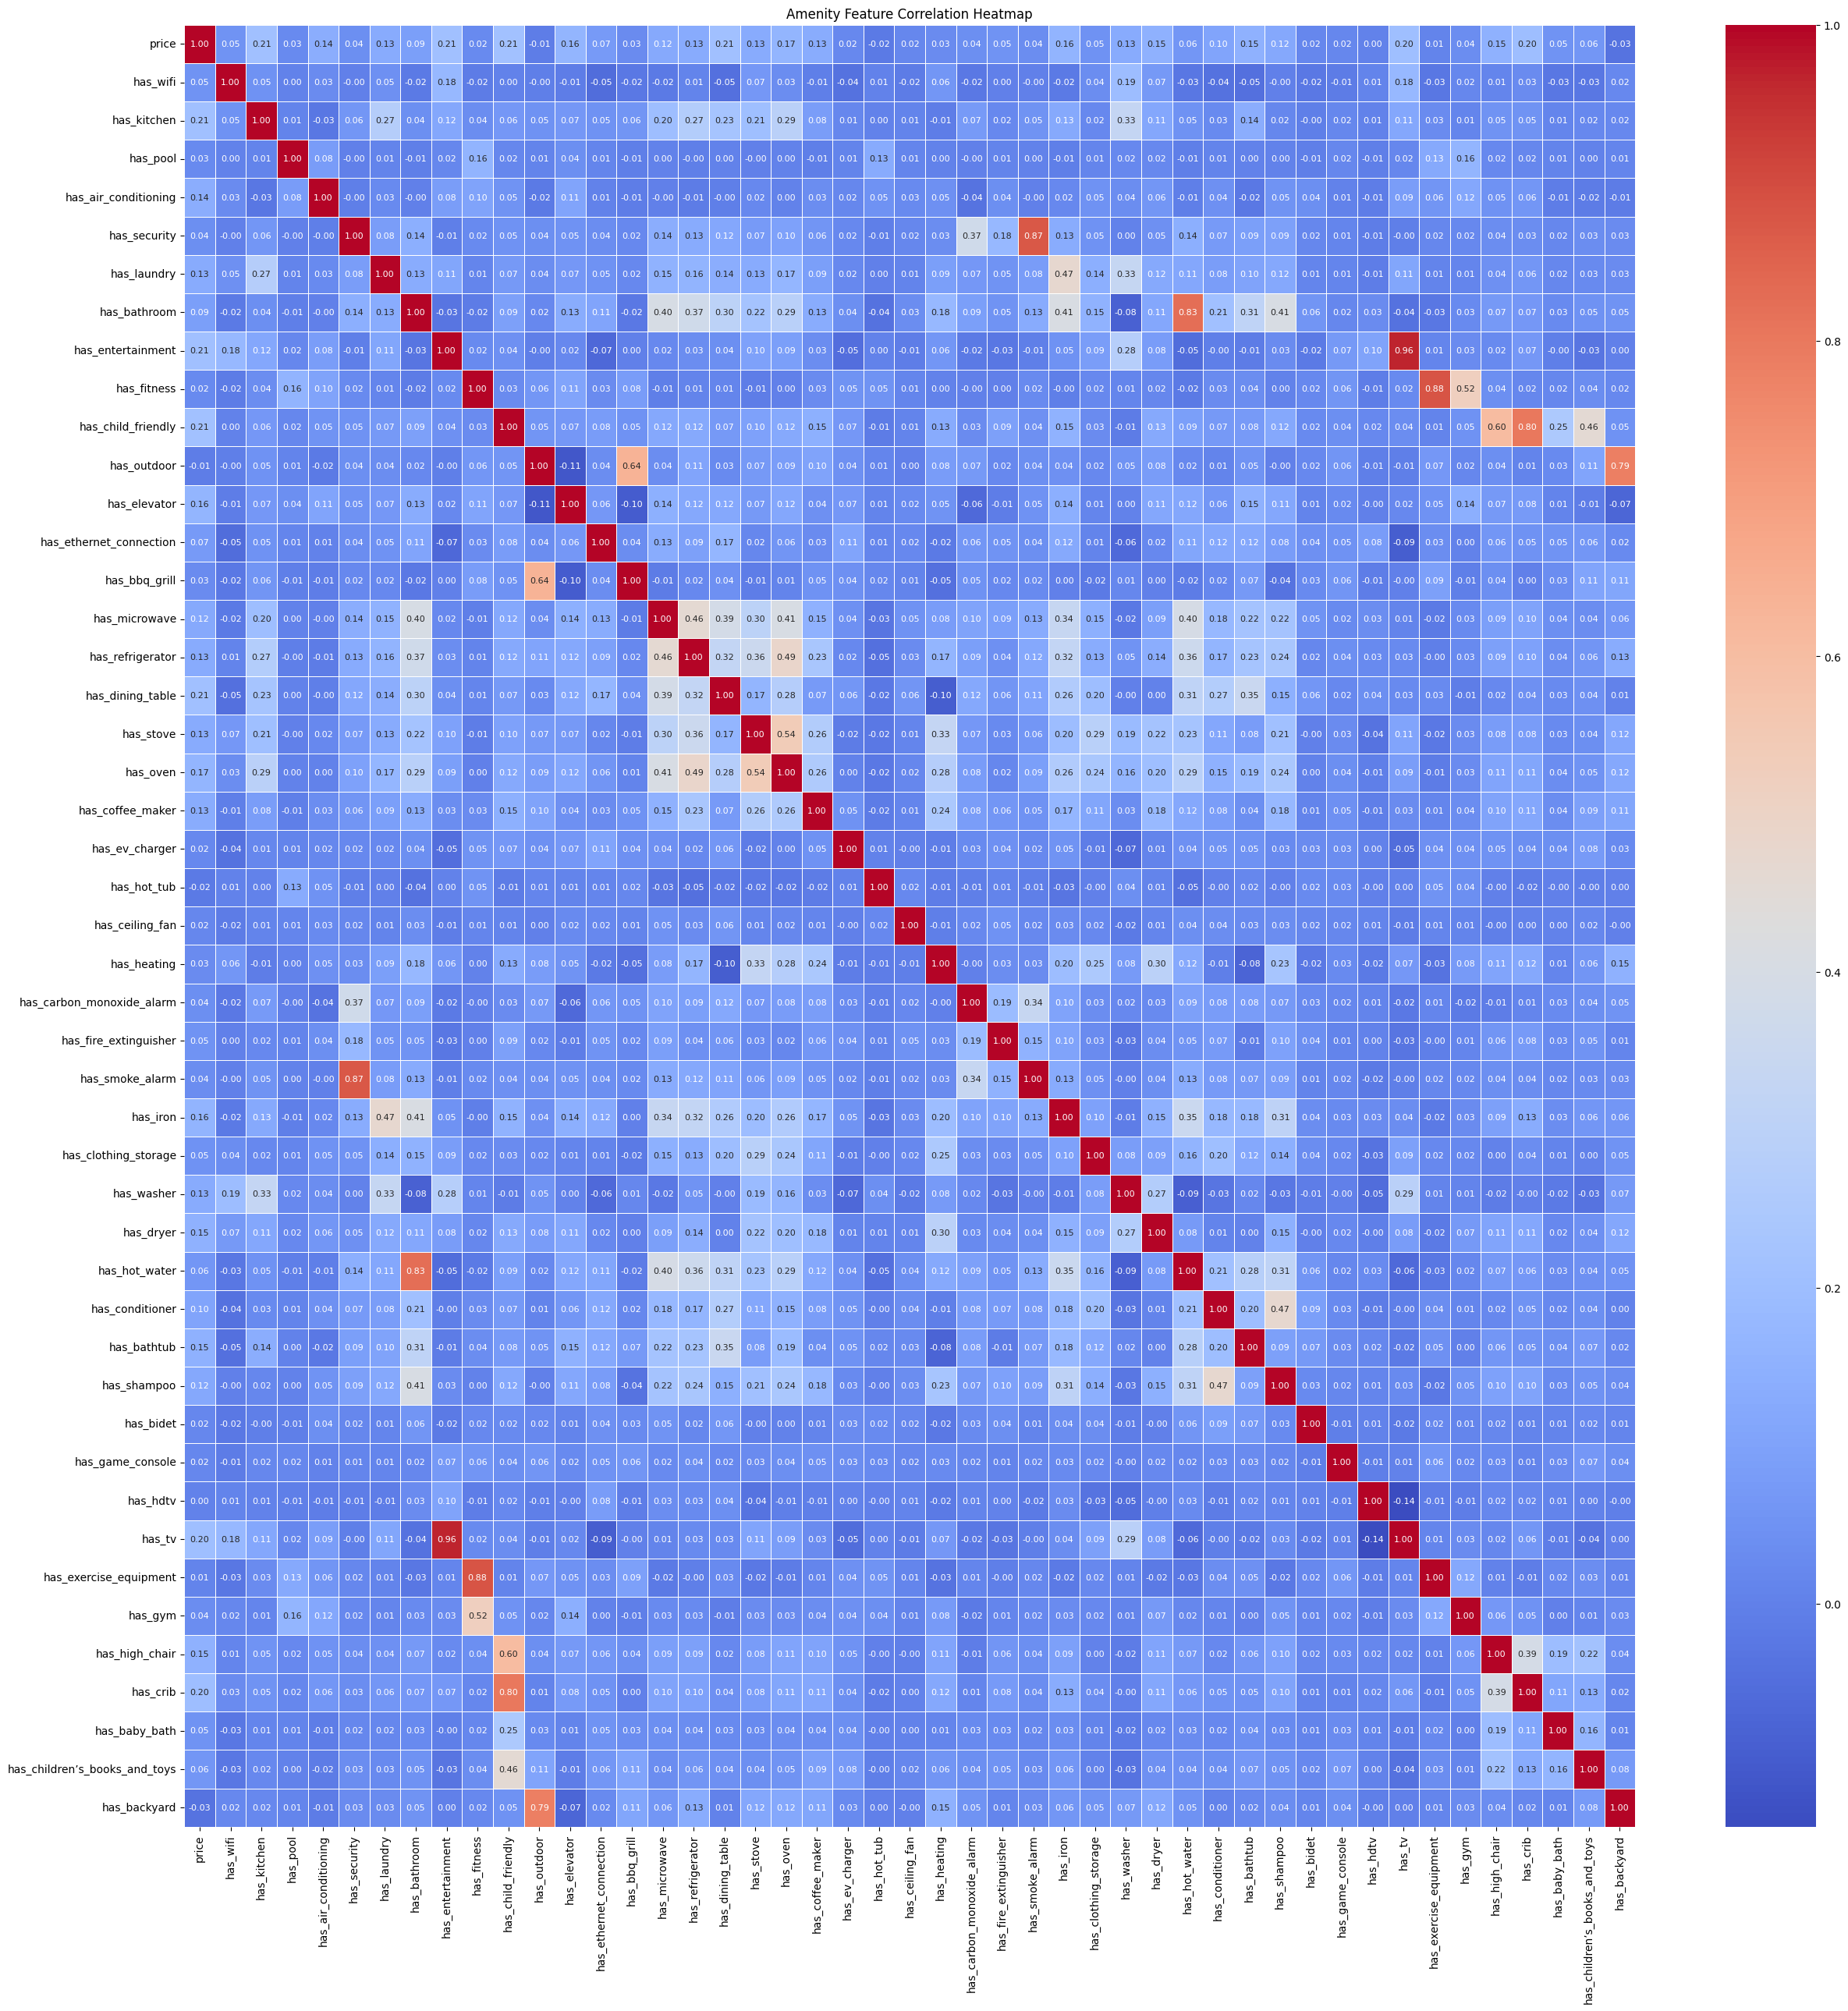

In [174]:
# amenities only heatmap
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
corr_matrix = df_cleaned[amenities_attribute_corr_columns]
# get rid of any columns that have constant values, offers nothing to correlate
corr_matrix = corr_matrix.loc[:, corr_matrix.nunique() > 1]
corr_matrix = corr_matrix.corr()

plt.figure(figsize=(30,30))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.title("Amenity Feature Correlation Heatmap")
plt.xticks(rotation=90)
plt.show()

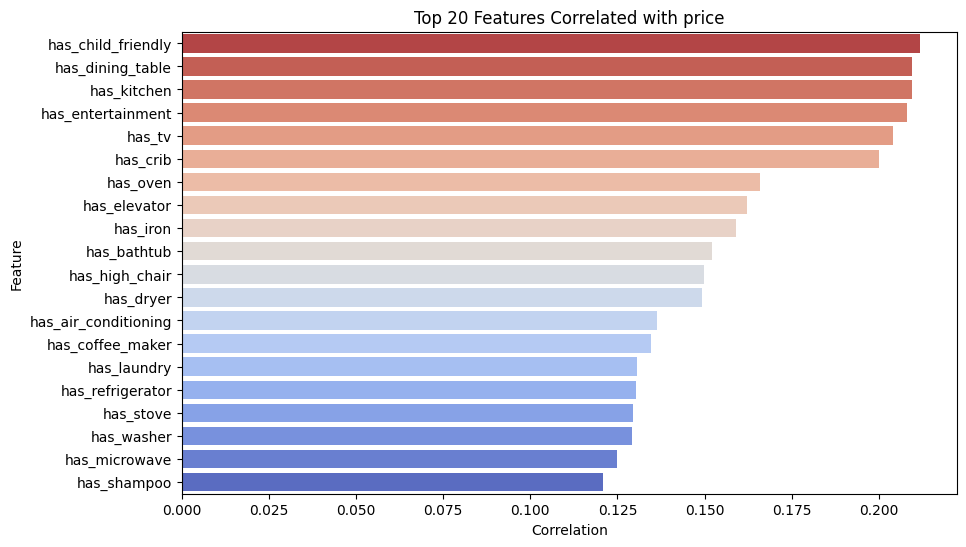

In [175]:
# Top 20 Most Correlated Features to 'Price'
target_feature = 'price'
top_10_corr = corr_matrix[target_feature].abs().sort_values(ascending=False)[1:21]  # Exclude self-correlation

# Plot Top 20 Correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_corr.values, y=top_10_corr.index, palette="coolwarm_r", hue=top_10_corr.index, legend="auto")  # "_r" reverses colors
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.title(f"Top 20 Features Correlated with {target_feature}")
plt.show()

Apparently having a dinner table in your AirBnB might have the greatest positive impact on your price listing.

We can do other forms of analysis with amenities.

In [176]:
# Current mean of all listings without any changes
print("Current price mean:")
print(df_cleaned.price.mean())

Current price mean:
143.63627713648998


We can check the mean price of all listings with any one amenitiy, and check against the mean price of all listings.

By doing so, we can see if there are any sizable increase in mean price listings based if a listing has a particular amenity.

In [177]:
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
check_mean = df_cleaned[amenities_attribute_corr_columns]

# Create a results list
results = []

# Iterate through each amenity column (excluding 'price')
for amenity in amenities_attribute_corr_columns[1:]:
    mean_with = check_mean.loc[check_mean[amenity] == 1, "price"].mean()
    mean_without = check_mean.loc[check_mean[amenity] == 0, "price"].mean()

    # Append to results
    results.append([amenity, mean_with, mean_without])

# Convert to DataFrame
df_amenity_means = pd.DataFrame(results, columns=["Amenity", "Mean Price (With)", "Mean Price (Without)"])

# Display the DataFrame
df_amenity_means

,Amenity,Mean Price (With),Mean Price (Without)
0,has_wifi,145.033551,128.306055
1,has_kitchen,149.736245,88.341482
2,has_pool,187.224299,143.519182
3,has_air_conditioning,188.523828,140.453839
4,has_security,144.400199,126.621212
5,has_laundry,146.439992,96.872953
6,has_bathroom,146.194479,121.135148
7,has_entertainment,158.701596,121.548104
8,has_fitness,153.437844,143.168813
9,has_child_friendly,191.201894,136.389647


We can list out the prices and compare them to see if they are above the mean or below it.

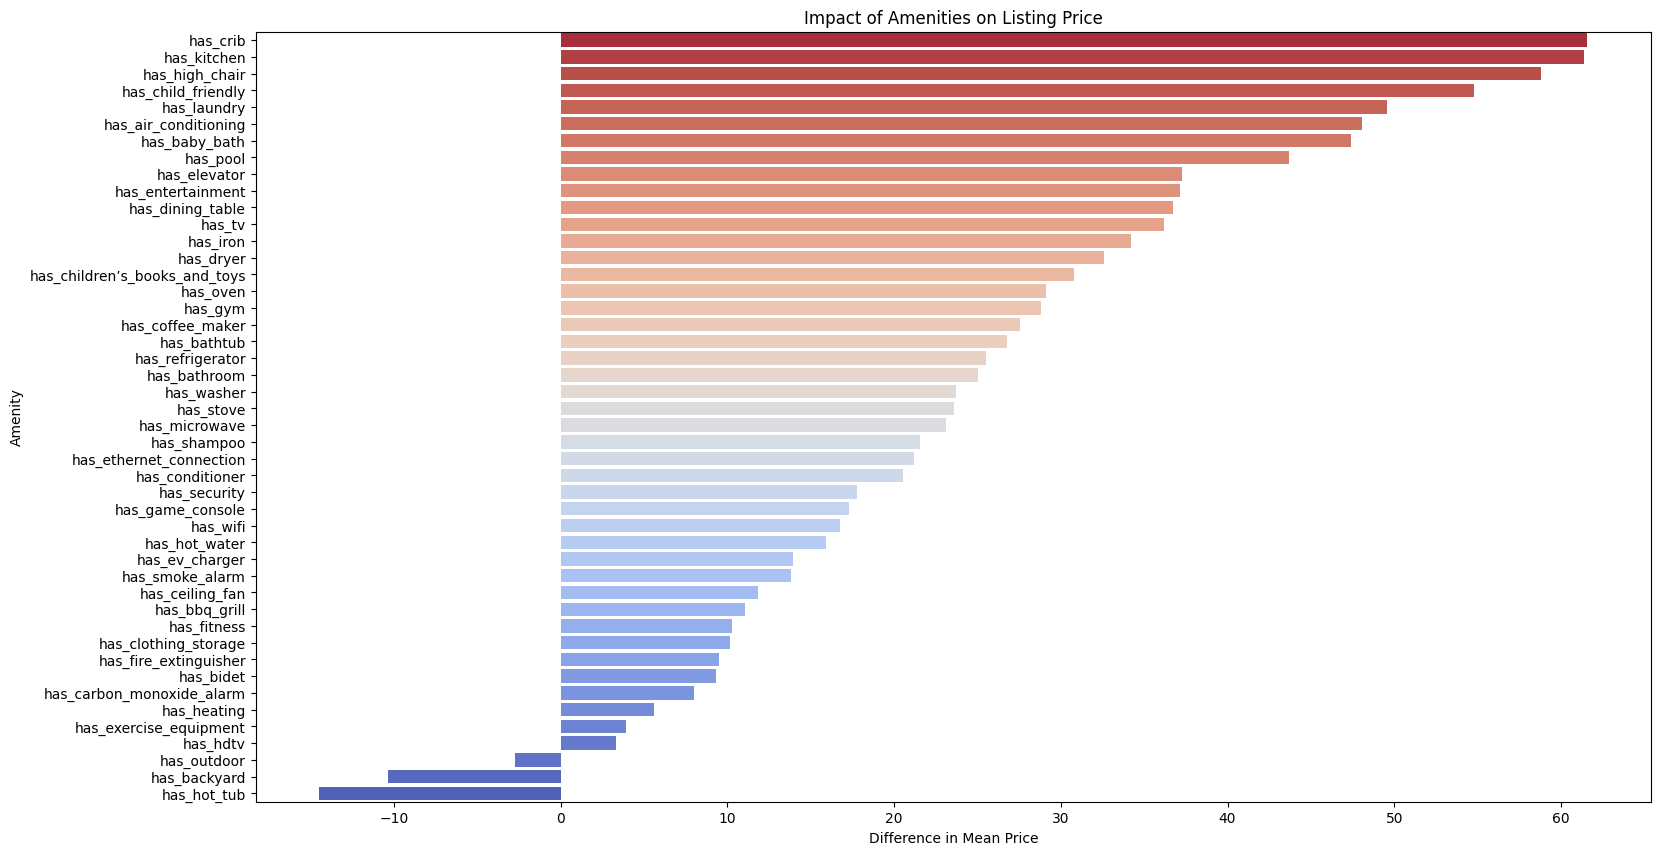

In [178]:
# get rid of the columns with empty values
df_amenity_means = df_amenity_means.dropna()

# Sort by price difference
df_amenity_means["Price Difference"] = df_amenity_means["Mean Price (With)"] - df_amenity_means["Mean Price (Without)"]
df_amenity_means = df_amenity_means.sort_values("Price Difference", ascending=False)

# Plot
plt.figure(figsize=(18, 10))
sns.barplot(data=df_amenity_means, x="Price Difference", y="Amenity", palette="coolwarm_r", legend="auto", hue="Amenity")
plt.title("Impact of Amenities on Listing Price")
plt.xlabel("Difference in Mean Price")
plt.ylabel("Amenity")
plt.show()

Below is a chi-squared analysis of amenity and prices

In [179]:
# Chi Squared Analysis
import scipy.stats as stats

# # Interpretation
# if p < 0.05:
#     print("Significant relationship between has_pool and price category!")
# else:
#     print("No significant relationship found.")
# Select relevant columns
amenities_attribute_corr_columns = ['price']
amenities_attribute_corr_columns.extend([col for col in df_cleaned.columns if col.startswith('has_')])
chi_sq = df_cleaned[amenities_attribute_corr_columns].copy()

# Create price categories
chi_sq['price_category'] = pd.qcut(chi_sq['price'], q=3, labels=["Low", "Medium", "High"])
print(chi_sq['price_category'].value_counts())

# Store results
significant_amenities = []

# Iterate over all amenities
for amenity in [col for col in chi_sq.columns if col.startswith('has_')]:
    contigency_table = pd.crosstab(chi_sq['price_category'], chi_sq[amenity])

    # Perform Chi-Square test
    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

    # Check significance (p < 0.05 means significant relationship)
    if p < 0.05:
        significant_amenities.append((amenity, p))

# Sort by p-value (ascending)
significant_amenities.sort(key=lambda x: x[1])

print(f"{len(significant_amenities)} amenities have postive impact on price.\n")

# Print results
print("Amenities with a significant relationship to price category:")
for amenity, p_value in significant_amenities:
    print(f"{amenity}: p-value = {p_value:.5f}")


price_category
Low       13442
High      13279
Medium    13216
Name: count, dtype: int64
45 amenities have postive impact on price.

Amenities with a significant relationship to price category:
has_kitchen: p-value = 0.00000
has_entertainment: p-value = 0.00000
has_child_friendly: p-value = 0.00000
has_dining_table: p-value = 0.00000
has_tv: p-value = 0.00000
has_crib: p-value = 0.00000
has_oven: p-value = 0.00000
has_iron: p-value = 0.00000
has_elevator: p-value = 0.00000
has_bathtub: p-value = 0.00000
has_refrigerator: p-value = 0.00000
has_laundry: p-value = 0.00000
has_washer: p-value = 0.00000
has_high_chair: p-value = 0.00000
has_stove: p-value = 0.00000
has_dryer: p-value = 0.00000
has_microwave: p-value = 0.00000
has_coffee_maker: p-value = 0.00000
has_shampoo: p-value = 0.00000
has_air_conditioning: p-value = 0.00000
has_conditioner: p-value = 0.00000
has_bathroom: p-value = 0.00000
has_ethernet_connection: p-value = 0.00000
has_hot_water: p-value = 0.00000
has_clothing_storag

**Room types**

Analysing what kind of effect the room type has on price.

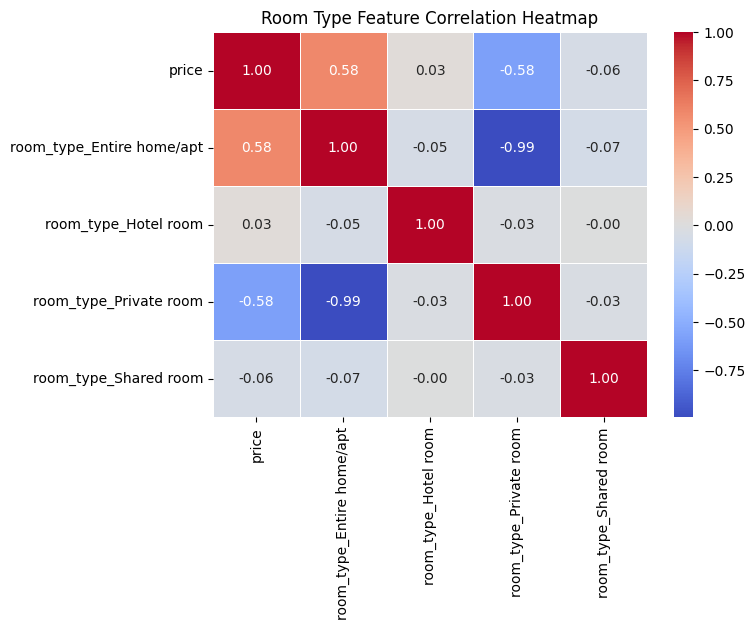

In [180]:
# room_types only heatmap
room_types_attribute_corr_columns = ['price', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room']
corr_matrix = df_cleaned[room_types_attribute_corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Room Type Feature Correlation Heatmap")
plt.show()

**Other physical attributes**

Here we can see the heatmap and other visual representation for each feature.

The graphs itself is pretty self-explanatory and simply shows the relationship between the features and price.

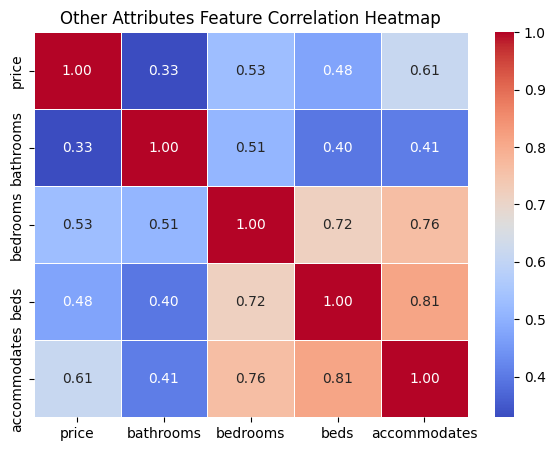

In [181]:
# the rest of the physical attribute features
other_atritbutes_corr_columns = ['price', 'bathrooms', 'bedrooms', 'beds', 'accommodates']
corr_matrix = df_cleaned[other_atritbutes_corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Other Attributes Feature Correlation Heatmap")
plt.show()

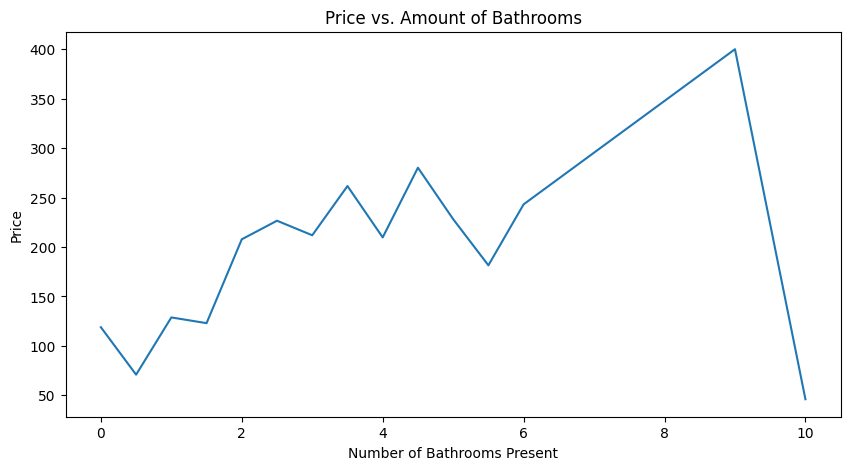

In [182]:
# Price against bathrooms graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="bathrooms", y="price", errorbar=None)
plt.xlabel("Number of Bathrooms Present")
plt.ylabel("Price")
plt.title("Price vs. Amount of Bathrooms")
plt.show()

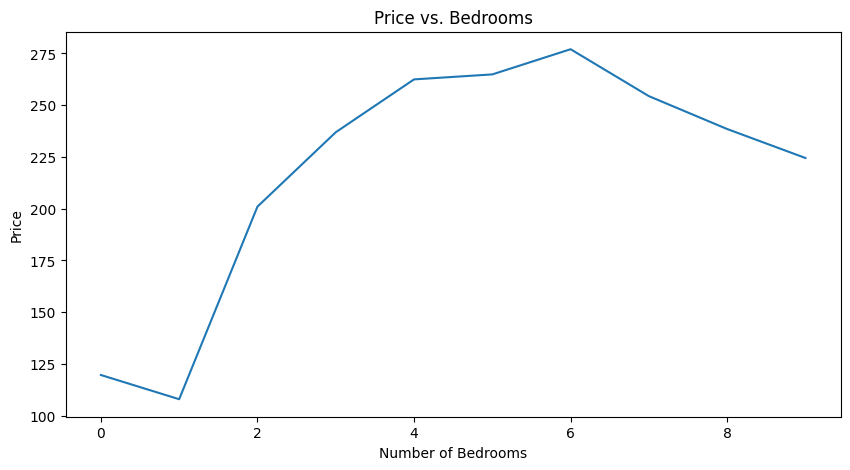

In [183]:
# Price against bedrooms graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="bedrooms", y="price", errorbar=None)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price vs. Bedrooms")
plt.show()

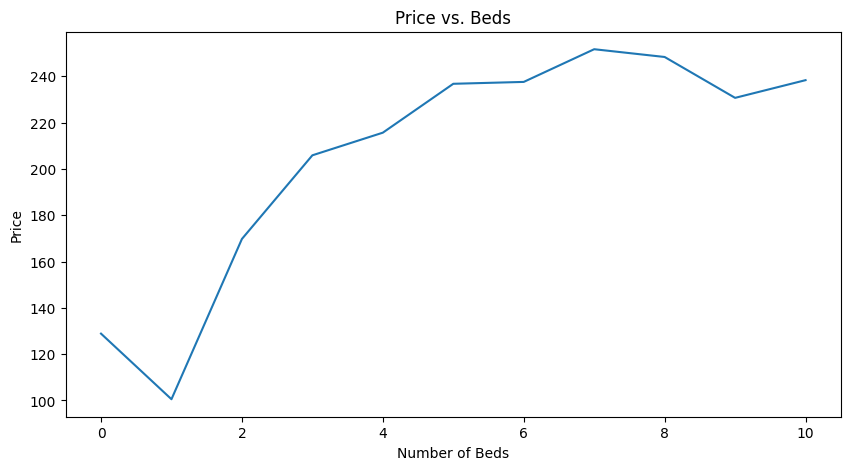

In [184]:
# Price against beds graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="beds", y="price", errorbar=None)
plt.xlabel("Number of Beds")
plt.ylabel("Price")
plt.title("Price vs. Beds")
plt.show()

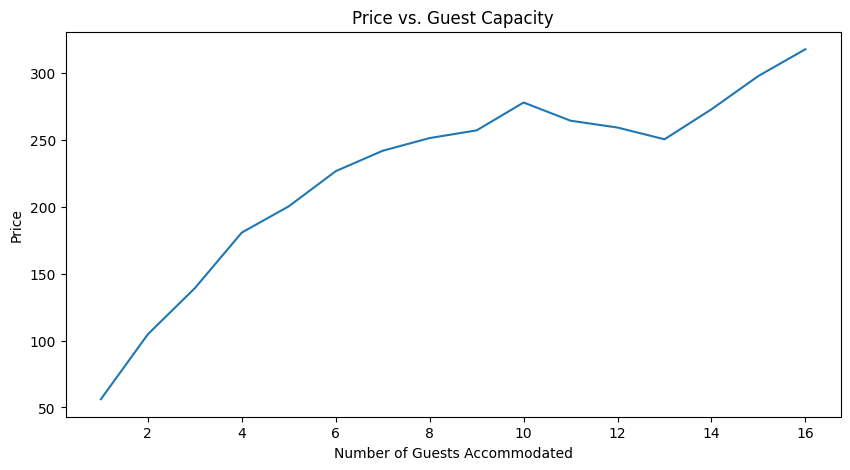

In [185]:
# Price against accomodation graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="accommodates", y="price", errorbar=None)
plt.xlabel("Number of Guests Accommodated")
plt.ylabel("Price")
plt.title("Price vs. Guest Capacity")
plt.show()

The graphs for accomodation seems the most stable, while the others follow a shaky trend. Accomodation also has the highest correlation score, so this tracks.

## 1.3 Location Attributes

We can try to process the data with location as we are given the longitude and latitude for each listing.

### 1.3.1 Cleaning and Processing of Location Attributes

In [186]:
location_attributes=['price','longitude','latitude','neighbourhood_cleansed']
df_cleaned[location_attributes].head()

,price,longitude,latitude,neighbourhood_cleansed
6,120.0,-0.11183,51.46156,Lambeth
8,40.0,-0.08007,51.46478,Southwark
12,83.0,-0.14651,51.54417,Camden
13,300.0,-0.14495,51.54236,Camden
14,70.0,-0.14875,51.61663,Barnet


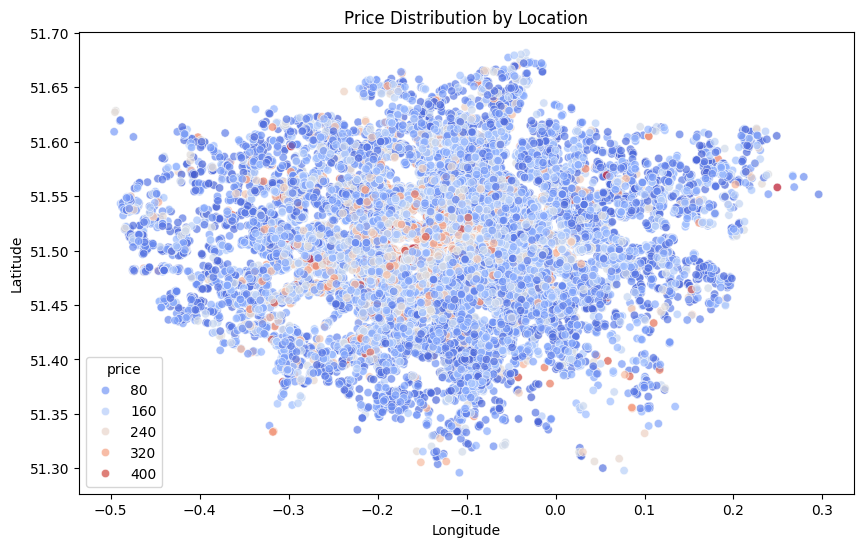

In [187]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="longitude", y="latitude", hue="price", palette="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price Distribution by Location")
plt.show()

In [188]:
# get basic descriptive info
print(df_cleaned['neighbourhood_cleansed'].describe())
# print(df_cleaned['neighbourhood_cleansed'].unique)
print(df_cleaned['neighbourhood_cleansed'].value_counts())

count           39937
unique             33
top       Westminster
freq             4803
Name: neighbourhood_cleansed, dtype: object
neighbourhood_cleansed
Westminster               4803
Tower Hamlets             2988
Camden                    2980
Kensington and Chelsea    2695
Hackney                   2241
Southwark                 2118
Lambeth                   2031
Islington                 1972
Wandsworth                1863
Hammersmith and Fulham    1769
Brent                     1370
Barnet                    1088
Newham                    1061
Lewisham                  1054
Ealing                    1043
Haringey                   957
Greenwich                  905
Waltham Forest             818
Croydon                    725
Merton                     591
Hounslow                   587
Richmond upon Thames       573
Hillingdon                 485
Enfield                    434
Redbridge                  394
Bromley                    375
City of London             327
Barking 

In [ ]:
# Cluster map
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create a base map centered around London
m = folium.Map(location=[df_cleaned["latitude"].mean(), df_cleaned["longitude"].mean()], zoom_start=11)

# Create a marker cluster (to group nearby points)
marker_cluster = MarkerCluster().add_to(m)

# Add points to the map
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"Price: {row['price']}"
    ).add_to(marker_cluster)

# Show the map
display(m)

In [ ]:
# Heatmap for distribution of listings
from folium.plugins import HeatMap

# Initialize map centered at the average location
m = folium.Map(location=[df_cleaned["latitude"].mean(), df_cleaned["longitude"].mean()], zoom_start=12)

# Prepare data: (latitude, longitude, price)
heat_data = list(zip(df_cleaned["latitude"], df_cleaned["longitude"], df_cleaned["price"]))

# Add heatmap
HeatMap(heat_data, radius=12, blur=8, max_zoom=13).add_to(m)

# Save and display
m.save("price_heatmap.html")
display(m)

**Nearest Distance to Any Station**

Author: https://www.doogal.co.uk/london_stations

We managed to find a dataset containing all rail stations in all of London,UK, not just the Greater London area.
This allows us to map the stations and see if the listings are near any train station. If they are, then the closer distance might result in a better pricing.

In [ ]:
from scipy.spatial import cKDTree
from geopy.distance import geodesic

# Load train station data (CSV format)
stations_df = pd.read_csv("london info datasets/London stations.csv")

# Extract station coordinates
station_coords = stations_df[["Latitude", "Longitude"]].values

# Build KDTree for fast lookup
tree = cKDTree(station_coords)

# Function to find nearest station efficiently
def get_nearest_station(row):
    listing_point = (row["latitude"], row["longitude"])
    dist, idx = tree.query(listing_point)  # Find nearest station index
    nearest_station = stations_df.iloc[idx]["Station"]  # Get station name
    nearest_distance = geodesic(listing_point, station_coords[idx]).km  # Distance in km
    return pd.Series([nearest_distance, nearest_station])

# Apply function efficiently
df_cleaned[["distance_to_nearest_station", "nearest_station"]] = df_cleaned.apply(get_nearest_station, axis=1)

# Normalize the distance (Min-Max Scaling)
min_dist = df_cleaned["distance_to_nearest_station"].min()
max_dist = df_cleaned["distance_to_nearest_station"].max()

df_cleaned["normalized_distance_to_station"] = (df_cleaned["distance_to_nearest_station"] - min_dist) / (max_dist - min_dist)

print("Updated listings with normalized station distances saved.")

# Append to location attributes
location_attributes.append('distance_to_nearest_station')
location_attributes.append('nearest_station')
location_attributes.append('normalized_distance_to_station')


**Cluster Grouping**

Form regional group based on location of listings.

If there are more listings in a particular area, group them into a cluster group. There are 2 types, one will be geographical based, the other will be through K-means

In [ ]:
# Geographical Cluster
# Compute mean latitude and longitude
mean_lat = df_cleaned["latitude"].mean()
mean_lon = df_cleaned["longitude"].mean()

# Function to assign NSEW clusters
def assign_nsew_cluster(row):
    if row["latitude"] >= mean_lat and row["longitude"] >= mean_lon:
        return "NE"
    elif row["latitude"] >= mean_lat and row["longitude"] < mean_lon:
        return "NW"
    elif row["latitude"] < mean_lat and row["longitude"] >= mean_lon:
        return "SE"
    else:
        return "SW"

# Apply clustering
df_cleaned["nsew_cluster"] = df_cleaned.apply(assign_nsew_cluster, axis=1)

# Check distribution
print(df_cleaned["nsew_cluster"].value_counts())
location_attributes.append('nsew_cluster')

In [ ]:
# Geographical Clustering graph
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_cleaned["longitude"],
    y=df_cleaned["latitude"],
    hue=df_cleaned["nsew_cluster"],
    palette={"NE": "red", "NW": "blue", "SE": "green", "SW": "orange"},
    alpha=0.6
)
plt.axvline(mean_lon, color="black", linestyle="--")  # Vertical line for E/W split
plt.axhline(mean_lat, color="black", linestyle="--")  # Horizontal line for N/S split
plt.title("NSEW Clusters Based on Latitude & Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

We can print out the average price for each region

In [ ]:
# Group by NSEW quadrant and calculate the average price
avg_price_per_quadrant = df_cleaned.groupby("nsew_cluster")["price"].mean()

# Print results
print(avg_price_per_quadrant)

In [ ]:
# K-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 15)  # Try k from 1 to 15

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cleaned[["longitude", "latitude"]])
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

Based on the graph, ~5 seems to be a good cutoff for the number of clusters, as it is where it starts stablising.

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters (tune this number)
num_clusters = 5 # based of

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_cleaned["location_cluster"] = kmeans.fit_predict(df_cleaned[["latitude", "longitude"]])
location_attributes.append('location_cluster')


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cleaned["longitude"],
    y=df_cleaned["latitude"],
    hue=df_cleaned["location_cluster"],
    palette="viridis",
    alpha=0.7
)
plt.title("Geographical Distribution of Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# also print out the average prices for the k-cluster
# Group by NSEW quadrant and calculate the average price
avg_price_per_cluster = df_cleaned.groupby("location_cluster")["price"].mean()

# Print results
print(avg_price_per_cluster)

**Visual Analysis of Price Density and Proximity**

Looking at the price density graph, it is apparent that listings near the middle have higher prices. This could be an indication that listings near the middle of London (i.e. in Central London) could have higher price due to proximity to central facilities.

In [ ]:
# Price Density heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df_cleaned["longitude"],
    y=df_cleaned["latitude"],
    weights=df_cleaned["price"],
    cmap="coolwarm",
    fill=True,
    alpha=0.6
)
plt.title("Heatmap of Price Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
# Density heatmap of physical listings
sns.kdeplot(
    x=df_cleaned["longitude"],
    y=df_cleaned["latitude"],
    cmap="Blues",
    fill=True,
    alpha=0.6
)
plt.title("Heatmap of Listing Density")  # This graph is for density of listings (how many listings are concentrated)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

We can use the densest point of the map (in this case using the gassian_kde estimate on the coordinates, based on the maps the middle point is roughly 51.50~,-0.2-1~) to roughly gauge where the center is.

In [ ]:
from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler

# Extract coordinates
longitudes = df_cleaned["longitude"].values
latitudes = df_cleaned["latitude"].values

# Compute KDE for density estimation
kde = gaussian_kde(np.vstack([longitudes, latitudes]))

# Find the highest density point
density_values = kde(np.vstack([longitudes, latitudes]))
max_density_idx = np.argmax(density_values)
central_lat, central_lon = latitudes[max_density_idx], longitudes[max_density_idx]

print(f"Determined Central Point: ({central_lat}, {central_lon})")

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c  # Distance in km

# Compute distance from KDE-determined central point
df_cleaned["distance_to_density_center"] = df_cleaned.apply(
    lambda row: haversine(row["latitude"], row["longitude"], central_lat, central_lon),
    axis=1
)

# Standardize the distance using Min-Max Scaling (0 to 1)
scaler = MinMaxScaler()
df_cleaned["proximity_to_density_center"] = 1 - scaler.fit_transform(df_cleaned[["distance_to_density_center"]])

# Print some results
df_cleaned[["latitude", "longitude", "distance_to_density_center", "proximity_to_density_center"]].head()
location_attributes.append("distance_to_density_center")
location_attributes.append("proximity_to_density_center")

Distance to center is the raw value in kilometers. Proximity is the scaled value where if the value is closer to 1, it is closer to the center.

### 1.3.2 Analysis of Location Attributes

Further breakdown of the location attributes.

In [ ]:
df_cleaned[location_attributes].head()

In [ ]:
# One-hot encode 'nsew_cluster'
df_cleaned = pd.get_dummies(df_cleaned, columns=["nsew_cluster"], prefix="nsew")

In [ ]:
# Drop these. Encoding them will become to complicated and might overfit
location_attributes.remove('nsew_cluster')
location_attributes.remove('neighbourhood_cleansed')
location_attributes.remove('nearest_station')
location_attributes.remove('longitude')
location_attributes.remove('latitude')
# add the one hot geo cluster
location_attributes.append('nsew_NE')
location_attributes.append('nsew_NW')
location_attributes.append('nsew_SE')
location_attributes.append('nsew_SW')

In [ ]:
df_cleaned[location_attributes].head()

In [ ]:
corr_matrix = df_cleaned[location_attributes].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap of all location attributes")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cleaned["distance_to_nearest_station"],
    y=df_cleaned["price"],
    alpha=0.5
)
plt.title("Price vs. Distance to Nearest Station")
plt.xlabel("Distance to Nearest Station (Meters)")
plt.ylabel("Price (£)")
plt.grid(True)
plt.show()

Location cluster seems ineffective in drawing any conclusions, while the geographical one seems to have more effect than the cluster. The distance and proximity to distance seems to also have strong correlation to price, but for distance to nearest station the effect seems present but minimal.

## 1.4 Host Atttributes

Feature processing with features corresponding to host information

The list of Host attribute features consists of:

 * 'host_response_time'
 * 'host_response_rate'
 * 'host_acceptance_rate'
 * 'host_is_superhost'
 * 'host_identity_verified'

In [ ]:
host_attributes = ['price','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified']
df_cleaned[host_attributes].head()

**Cleaning Features**

We have to clean the data once again and see the relationship between these features and price.

**Response Time and Rate, Acceptance Rate**

These features are unique and have to be normalised/tagged before they are able to be used for the model.

In [ ]:
# pull the values and see unique counts, whats available
# start with response time and rate, with acceptance rate
print("Response time data:\n")
print(df_cleaned.host_response_time.unique())
print(df_cleaned.host_response_time.value_counts())
print("\nResponse rate data:\n")
print(df_cleaned.host_response_rate.unique())
print(df_cleaned.host_response_rate.value_counts())
print("\nAcceptance rate data:\n")
print(df_cleaned.host_acceptance_rate.unique())
print(df_cleaned.host_acceptance_rate.value_counts())

We can encode the values for the response time, and convert the percentages into numerical values and normalise them.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
unique_response_time = df_cleaned.host_response_time.unique()
mapped = le.fit_transform(unique_response_time)

mapping = dict(zip(mapped, unique_response_time))
sorted_dict = dict(sorted(mapping.items()))
print(sorted_dict)

df_cleaned['host_response_time'] = le.fit_transform(df_cleaned['host_response_time'])
# df_cleaned_no_outliers['host_response_time'] = le.fit_transform(df_cleaned_no_outliers['host_response_time'])
df_cleaned['host_response_time'].head()

In [ ]:
# Convert percentage strings to float and normalize
df_cleaned["host_response_rate"] = df_cleaned["host_response_rate"].str.rstrip("%").astype(float) / 100
df_cleaned["host_acceptance_rate"] = df_cleaned["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

# Convert percentage strings to float and normalize
# df_cleaned_no_outliers["host_response_rate"] = df_cleaned_no_outliers["host_response_rate"].str.rstrip("%").astype(float) / 100
# df_cleaned_no_outliers["host_acceptance_rate"] = df_cleaned_no_outliers["host_acceptance_rate"].str.rstrip("%").astype(float) / 100

In [ ]:
# show the new cleaned values
df_cleaned[["host_response_rate", "host_acceptance_rate"]].head()

In [ ]:
# For superhost and verified columns
print(df_cleaned.host_is_superhost.value_counts())
print(f"Percentage of hosts that are superhost: {(df_cleaned.host_is_superhost.value_counts().iloc[0]/df_cleaned.host_is_superhost.value_counts().sum())*100:.2f}")
print(df_cleaned.host_identity_verified.value_counts())
print(f"Percentage of hosts that are verified: {(df_cleaned.host_identity_verified.value_counts().iloc[0]/df_cleaned.host_identity_verified.value_counts().sum())*100:.2f}")

In [ ]:
# one hot encode the superhost and verified columns
df_cleaned["host_is_superhost"] = df_cleaned["host_is_superhost"].map({"t": True, "f": False})
df_cleaned["host_identity_verified"] = df_cleaned["host_identity_verified"].map({"t": True, "f": False})
# df_cleaned_no_outliers["host_is_superhost"] = df_cleaned_no_outliers["host_is_superhost"].map({"t": True, "f": False})
# df_cleaned_no_outliers["host_identity_verified"] = df_cleaned_no_outliers["host_identity_verified"].map({"t": True, "f": False})

df_cleaned[["host_is_superhost", "host_identity_verified"]].head()

**Analysis**

Now we can further analyse the features and their relationship to price.

As usual we can start with the heatmap.

In [ ]:
# generate heatmap
corr_host = df_cleaned[host_attributes].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_host, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Host Features Heatmap")
plt.show()

Lack of variance in data (i.e. actual numerical value) makes it hard to see positive relationships in heatmaps

It would be better to see other forms of analysis.

**Response Time**

Deos response time seem to affect pricing? It seems to be somewhat affected.

In [ ]:
# Host response time vs. Price
plt.figure(figsize=(8, 5))
sns.boxplot(x="host_response_time", y="price", data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Price Distribution by Host Response Time")
plt.show()

Do higher response/acceptance rates lead to higher/lower prices?
Are there clusters of hosts charging extreme prices with low engagement?

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="host_response_rate", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Host Response Rate")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="host_acceptance_rate", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Host Acceptance Rate")
plt.show()

In [ ]:
print(df_cleaned["price"].mean())
print(df_cleaned.groupby("host_response_time")["price"].mean().sort_values())
print(df_cleaned.groupby("host_is_superhost")["price"].mean())

# plot into bar graph
# Calculate overall average price
avg_price = df_cleaned["price"].mean()

# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_response_time", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Add title and legend
plt.title("Average Price by Host Response Time")
plt.legend()
plt.show()


Are Superhosts charging more on average?

In [ ]:
# Host is superhost vs. Price
plt.figure(figsize=(6, 4))
sns.boxplot(x="host_is_superhost", y="price", data=df_cleaned)
plt.title("Price Distribution for Superhosts vs. Non-Superhosts")
plt.show()

In [ ]:
# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_is_superhost", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Non-Superhost", "Superhost"])

# Add title and legend
plt.title("Average Price by Superhost Status")
plt.legend()
plt.show()


In [ ]:
# Create bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="host_identity_verified", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Non-Verified", "Verified"])

# Add title and legend
plt.title("Average Price by Verified Status")
plt.legend()
plt.show()

## 1.5 Review Attributes

Feature processing with features corresponding to reviews given by users for each listing.

This conists of :

* 'number_of_reviews',
* 'review_scores_rating',
* 'review_scores_accuracy',
* 'review_scores_cleanliness',
* 'review_scores_checkin',
* 'review_scores_communication',
* 'review_scores_location',
* 'review_scores_value',
* 'reviews_per_month',

In [ ]:
review_attributes = ['price',
'number_of_reviews',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month']
df_cleaned[review_attributes].head()

In [ ]:
# for number of reviews, check the mean and outliers
print(df_cleaned.number_of_reviews.describe())

In [ ]:
# normalise the review scores
from sklearn.preprocessing import MinMaxScaler

# Select only the review score columns
review_cols = [
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"
]

# Apply MinMaxScaler (0-5 → 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_cleaned[review_cols] = scaler.fit_transform(df_cleaned[review_cols])
df_cleaned[review_attributes].head()
# df_cleaned_no_outliers[review_cols] = scaler.fit_transform(df_cleaned_no_outliers[review_cols])

In [ ]:
# check the monthly reviews
print(df_cleaned.reviews_per_month.describe())

In [ ]:
# heatmap
corr_review = df_cleaned[review_attributes].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_review, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
# prices against number of reviews
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="number_of_reviews", y="price", errorbar=None)
plt.xlabel("Number of Reviews per Listing")
plt.ylabel("Price")
plt.title("Price vs. Reviews")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="review_scores_rating", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Review Score Rating Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="review_scores_cleanliness", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Reviews Scores Cleanliness Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="reviews_per_month", y="price", data=df_cleaned, alpha=0.5)
plt.title("Price vs. Reviews Per Month Distribution")
plt.show()

There's not much correlation in this dataset to warrent using the reviews statistics as a main feature.

## 1.6 AirBnB Booking Attributes

This is feature processing related to other factors related to the booking process.

This includes:

* 'minimum_nights',
* 'maximum_nights',
* 'minimum_minimum_nights',
* 'maximum_minimum_nights',
* 'minimum_maximum_nights',
* 'maximum_maximum_nights',
* 'minimum_nights_avg_ntm',
* 'availability_30',
* 'availability_60',
* 'availability_90',
* 'availability_365',
* 'instant_bookable',

In [ ]:
booking_attributes = ['minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'instant_bookable']
df_cleaned[booking_attributes].head()

In [ ]:
# can consider dropping some of the columns here due to redundancy
print(df_cleaned["minimum_nights"].unique())
print(df_cleaned["minimum_nights"].value_counts())
print(df_cleaned["maximum_nights"].unique())
print(df_cleaned["maximum_nights"].value_counts())

In [ ]:
# check the availabilty columns
print(df_cleaned['availability_30'].unique())
print(df_cleaned['availability_30'].value_counts())
print(df_cleaned['availability_60'].unique())
print(df_cleaned['availability_60'].value_counts())
print(df_cleaned['availability_90'].unique())
print(df_cleaned['availability_90'].value_counts())
print(df_cleaned['availability_365'].unique())
print(df_cleaned['availability_365'].value_counts())

In [ ]:
# can drop the min-min nights, max-min nights, min-max nights, max-max nights, kinda redundant
# print(len(df_cleaned.columns))
# df_cleaned.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"], inplace=True)
# df_cleaned_no_outliers.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"], inplace=True)
# print(len(df_cleaned.columns))

Leave availabilty as it is. Leave the average nights as well.

In [ ]:
# map instant bookable
df_cleaned["instant_bookable"] = df_cleaned["instant_bookable"].map({"t": True, "f": False})
# df_cleaned_no_outliers["instant_bookable"] = df_cleaned_no_outliers["instant_bookable"].map({"t": True, "f": False})
df_cleaned["instant_bookable"].head()

In [ ]:
# heatmap the shit
corr_columns = ['price',
'minimum_nights',
'maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'instant_bookable']

corr_host = df_cleaned[corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_host, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Booking Features Heatmap")
plt.show()

In [ ]:
# Check minimum nights graph against price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["minimum_nights"], y=df_cleaned["price"])
plt.title("Price vs. Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.show()


The booking attributes seem to have poor correlated attributes. For now, only the features *avaliabilty_365* and *instant_bookable* seem to be worth looking into.

In [ ]:
# analyse availabilty_365
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["availability_365"], y=df_cleaned["price"])
plt.title("Price vs. Availability (Days per Year)")
plt.xlabel("Availability (Days in a Year)")
plt.ylabel("Price")
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["host_is_superhost"], y=df_cleaned["availability_365"])
plt.title("Availability by Superhost Status")
plt.xlabel("Superhost")
plt.ylabel("Availability (Days per Year)")
plt.show()


In [ ]:
df_viz = df_cleaned.copy()  # Create a copy to avoid modifying the original data
room_col = ['room_type_Entire home/apt','room_type_Hotel room',	'room_type_Private room',	'room_type_Shared room']

# Convert one-hot encoded columns back to a single categorical column
df_viz["room_type"] = df_viz[room_col].idxmax(axis=1).str.replace("room_type_", "")

# Now plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_viz["room_type"], y=df_viz["availability_365"])
plt.title("Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Availability (Days per Year)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# See distribution of availabilty
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["availability_365"], bins=30, kde=True)
plt.title("Distribution of Availability (Days per Year)")
plt.xlabel("Availability (Days in a Year)")
plt.ylabel("Count of Listings")
plt.show()


It is hard to see any kind of relationship here.

In [ ]:
# Create bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="instant_bookable", y="price", data=df_cleaned, estimator=lambda x: x.mean())

# Add a horizontal line for average price
plt.axhline(avg_price, color='red', linestyle='dashed', linewidth=2, label=f'Avg Price: {avg_price:.2f}')

# Annotate each bar with its mean price
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set proper xticks before setting labels
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Instant Bookable", "Is Instant Bookable"])

# Add title and legend
plt.title("Average Price by Booking Status")
plt.legend()
plt.show()

## 1.7 Final Findings

We will be using most of the physical attributes and location attributes. But for host, review and the booking attributes these have little bearing on the price prediction, so it will be removed.

In [ ]:
print(df_cleaned.columns)
# drop the following
drop_list = ['minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'name',
'description',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'host_identity_verified',
'amenities',
'neighbourhood_cleansed',
'longitude',
'latitude',
'nearest_station',
'location_cluster'
]

df_cleaned = df_cleaned.drop(columns=drop_list)
# df_cleaned_no_outliers = df_cleaned_no_outliers.drop(columns=drop_list)

In [ ]:
print(df_cleaned.columns)
print(len(df_cleaned.columns))
df_cleaned.head(3)

# 2. Additional Feature Engineering

This section will solely for feature engineering more relevant columns to be used and tested. 

In [ ]:
from sklearn.cluster import KMeans

# Ensure no division by zero (adding +1)
df_cleaned["room_density"] = df_cleaned["beds"] / (df_cleaned["bedrooms"] + 1)
df_cleaned["space_per_bed"] = df_cleaned["accommodates"] / (df_cleaned["beds"] + 1)

# Log Transform (if needed)
df_cleaned["log_accommodation"] = np.log1p(df_cleaned["accommodates"])
df_cleaned["log_bedrooms"] = np.log1p(df_cleaned["bedrooms"])
df_cleaned["log_beds"] = np.log1p(df_cleaned["beds"])

# Polynomial Features
df_cleaned["bedrooms_squared"] = df_cleaned["bedrooms"] ** 2
df_cleaned["beds_squared"] = df_cleaned["beds"] ** 2
df_cleaned["accommodation_beds_interaction"] = df_cleaned["accommodates"] * df_cleaned["beds"]

# K-Means Clustering (Choose a reasonable number of clusters, e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned["room_cluster"] = kmeans.fit_predict(df_cleaned[["accommodates", "bedrooms", "beds"]])

engineered_cols = ['price',
                   'room_density',
                   'space_per_bed',
                   'log_accommodation',
                   'log_bedrooms',
                   'log_beds',
                   'bedrooms_squared',
                   'beds_squared',
                   'accommodation_beds_interaction',
                   'room_cluster']

# Display the first few rows to check the new features
df_cleaned[engineered_cols].head()


In [ ]:
# Compute correlation with target variable (e.g., 'price')
corr_matrix = df_cleaned[engineered_cols].corr()

# Sort correlations to see the strongest ones
corr_with_target = corr_matrix["price"].sort_values(ascending=False)
print(corr_with_target)

In [ ]:
# Drop the least correlated engineered features     
df_cleaned.drop(columns=['room_cluster','space_per_bed', 'room_density'])

In [ ]:
df_cleaned.columns.to_list()

## **Outliers**

We are going to separate more outliers from the curve and perform analysis to see if the data is actually accurate.

In [ ]:
# check here WIP
# Compute KDE (smoothed curve from histogram)
kde = sns.kdeplot(df_cleaned["price"], bw_adjust=0.5)

# Find the peak (mode) of the distribution
peak_price = df_cleaned["price"].mode()[0]

# Define threshold dynamically (e.g., 2x peak price)
threshold = 2 * peak_price

# Split data
df_cleaned_no_outliers = df_cleaned[df_cleaned["price"] <= threshold]
df_cleaned_outliers = df_cleaned[df_cleaned["price"] > threshold]

In [ ]:
# show the changes
print(f"Original cleaned :{df_cleaned.shape[0]}")
print(f"Outliers removed :{df_cleaned_no_outliers.shape[0]}")
print(f"Outliers only : {df_cleaned_outliers.shape[0]}")

In [ ]:
df_cleaned['price'].head()

# 3. Data Fitting and Model Training

We will be focused on comparing results from RandomForest and SVM. We have a linear regression model as a baseline.

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Linear**

In [ ]:
# 🔹 Split data into training and testing sets (80-20 split)
linear_X = df_cleaned.drop(columns='price')  # Features
linear_y = df_cleaned['price']  # Target Variable

linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(
    linear_X, linear_y, test_size=0.2, random_state=42
)

# 🔹 Initialize and train Linear Regression model
lr_model = LinearRegression()
# Start timer
start_time = time.time()
# train
lr_model.fit(linear_X_train, linear_y_train)
# End timer
train_time_lr = time.time() - start_time

# 🔹 Make predictions
start_time = time.time()
linear_y_pred_lr = lr_model.predict(linear_X_test)
# End timer
predict_time_lr= time.time() - start_time

# 🔹 Evaluate the model
mae_lr = mean_absolute_error(linear_y_test, linear_y_pred_lr)
mse_lr = mean_squared_error(linear_y_test, linear_y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(linear_y_test, linear_y_pred_lr)

# 🔹 Print Evaluation Metrics
print(f"Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")
print(f"Training Time: {train_time_lr:.4f} seconds")
print(f"Prediction Time: {predict_time_lr:.6f} seconds")

# 🔹 Plot Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=linear_y_test, y=linear_y_pred_lr, alpha=0.5)
plt.plot([linear_y_test.min(), linear_y_test.max()],
         [linear_y_test.min(), linear_y_test.max()],
         color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

## **SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# Fitting
# X = df_cleaned.drop(columns=['price'])
# y = df_cleaned['price']
X = df_cleaned_no_outliers.drop(columns=['price'])
y = df_cleaned_no_outliers['price']

print("Features shape:", X.shape, "Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    
print("Training set shape (scaled):", X_train_scaled.shape)
print("Test set shape (scaled):", X_test_scaled.shape)


### SVM Kernel Comparison

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Compute and print evaluation metrics for a model."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    return r2, mae, rmse

############################################################
# 1. Kernel Comparison Setup
############################################################

# List of kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store results for comparison
comparison_results = []

############################################################
# 2. Compare SVM Kernels
############################################################
for k in kernels:
    print(f"\n--- Evaluating SVM with '{k}' kernel ---")
    
    # Create the SVR model
    # - For the polynomial kernel, we explicitly set degree=3.
    # - For others, we keep default parameters except C=1.0 for consistency.
    if k == 'poly':
        svm_model = SVR(kernel=k, C=1.0, degree=3)
    else:
        svm_model = SVR(kernel=k, C=1.0)
    
    start_time = time.time()
    # Train the model
    svm_model.fit(X_train_scaled, y_train)
    train_time = start_time - time.time()


    # Predict on test data
    start_time =  time.time()
    y_pred = svm_model.predict(X_test_scaled)
    predict_time = start_time - time.time()

    # Evaluate the model using your custom function
    r2, mae, rmse = evaluate_model(y_test, y_pred, f"SVM ({k} kernel)")
    
    # Append results in a list for each kernel
    comparison_results.append([k, mae, rmse, r2, train_time, predict_time])

############################################################
# 3. Create and Print Comparison Table (Without MSE)
############################################################
df_kernel_comparison = pd.DataFrame(
    comparison_results,
    columns=["Kernel", "MAE", "RMSE", "R² Score", "Training Time", "Prediction Time"]
)

print("\nSVM Kernel Comparison Results:")
print(df_kernel_comparison)


### Baseline SVM (linear)

In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from skopt import BayesSearchCV


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    """Compute and print evaluation metrics for a model."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Performance Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    return r2, mae, rmse


print("\n--- 5.1 Baseline SVM (Linear) ---")
# Train SVR with linear kernel on scaled data
svm_linear = SVR(kernel='linear', C=1.0)
start_time = time.time()
svm_linear.fit(X_train_scaled, y_train)
train_time_svm_liner = time.time() - start_time 

start_time = time.time()
y_pred_linear = svm_linear.predict(X_test_scaled)
predict_time_svm_linear = time.time() - start_time

r2_base, mae_base, rmse_base = evaluate_model(y_test, y_pred_linear, "Baseline SVM (Linear)")
print(f"Training Time: {train_time_svm_liner:.4f} seconds")
print(f"Prediction Time: {predict_time_svm_linear:.6f} seconds")

### Bayesian Tuned SVM (Linear)

In [ ]:
print("\n--- 5.2 Bayesian Tuned SVM (Linear) ---")
from skopt import BayesSearchCV

# Define hyperparameter search space
param_space = {
    'C': (0.1, 100.0, 'log-uniform'),
    'epsilon': (0.01, 10.0, 'log-uniform')
}
# Bayesian optimization for linear SVM with reduced iterations and CV
svm_linear_bayes = BayesSearchCV(
    estimator=SVR(kernel='linear'),
    search_spaces=param_space,
    n_iter=5,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
start_time = time.time()
svm_linear_bayes.fit(X_train_scaled, y_train)
train_time_baye_svm_lr = time.time() - start_time
print("Best parameters for linear SVM:", svm_linear_bayes.best_params_)

start_time = time.time()
y_pred_linear_bayes = svm_linear_bayes.predict(X_test_scaled)
predict_time_baye_svm_linear = time.time() - start_time

r2_bayes, mae_bayes, rmse_bayes = evaluate_model(y_test, y_pred_linear_bayes, "Bayesian Tuned SVM (Linear)")
print(f"Training Time: {train_time_baye_svm_lr:.4f} seconds")
print(f"Prediction Time: {predict_time_baye_svm_linear:.6f} seconds")


### Blended Model (SVM + XGBoost + LightGBM) with Scaled Data

In [ ]:
print("\n--- 5.3 Blended Model (SVM+XGB+LGB) ---")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# # Train a baseline SVM (linear kernel) on scaled data
# svm_model = SVR(kernel='linear', C=1.0)
# svm_model.fit(X_train_scaled, y_train)
# y_pred_svm = svm_model.predict(X_test_scaled)

# # Train XGBoost
# xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# xgb_model.fit(X_train_scaled, y_train)
# y_pred_xgb = xgb_model.predict(X_test_scaled)

# # Train LightGBM
# lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# lgb_model.fit(X_train_scaled, y_train)
# y_pred_lgb = lgb_model.predict(X_test_scaled)

# # Blend predictions (simple average)
# y_pred_blend = (y_pred_svm + y_pred_xgb + y_pred_lgb) / 3
# r2_blend, mae_blend, rmse_blend = evaluate_model(y_test, y_pred_blend, "Blended Model (SVM+XGB+LGB)")
# Track total training time
start_time = time.time()

# Train SVM
svm_start = time.time()
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_train_time = time.time() - svm_start

# Train XGBoost
xgb_start = time.time()
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_train_time = time.time() - xgb_start

# Train LightGBM
lgb_start = time.time()
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
lgb_train_time = time.time() - lgb_start

total_train_time = time.time() - start_time

# Track total prediction time
pred_start = time.time()

# Predict SVM
svm_pred_start = time.time()
y_pred_svm = svm_model.predict(X_test_scaled)
svm_pred_time = time.time() - svm_pred_start

# Predict XGBoost
xgb_pred_start = time.time()
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_pred_time = time.time() - xgb_pred_start

# Predict LightGBM
lgb_pred_start = time.time()
y_pred_lgb = lgb_model.predict(X_test_scaled)
lgb_pred_time = time.time() - lgb_pred_start

# Blended Prediction
blend_pred_start = time.time()
y_pred_blend = (y_pred_svm + y_pred_xgb + y_pred_lgb) / 3
blend_pred_time = time.time() - blend_pred_start

total_pred_time = time.time() - pred_start

# Evaluate blended model
r2_blend, mae_blend, rmse_blend = evaluate_model(y_test, y_pred_blend, "Blended Model (SVM+XGB+LGB)")

# Print training and prediction times
print("\n--- Training Times ---")
print(f"SVM Training Time: {svm_train_time:.4f} sec")
print(f"XGBoost Training Time: {xgb_train_time:.4f} sec")
print(f"LightGBM Training Time: {lgb_train_time:.4f} sec")
print(f"Total Training Time: {total_train_time:.4f} sec")

print("\n--- Prediction Times ---")
print(f"SVM Prediction Time: {svm_pred_time:.4f} sec")
print(f"XGBoost Prediction Time: {xgb_pred_time:.4f} sec")
print(f"LightGBM Prediction Time: {lgb_pred_time:.4f} sec")
print(f"Blended Prediction Time: {blend_pred_time:.4f} sec")
print(f"Total Prediction Time: {total_pred_time:.4f} sec")

### Advanced Stacking (SVM + XGBoost + LightGBM + Ridge) with Scaled Data

In [ ]:
print("\n--- 5.4 Advanced Stacking (SVM+XGB+LGB+Ridge) ---")
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base estimators (without RF)
estimators = [
    ('svm', SVR(kernel='linear', C=1.0)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]
# Stacking regressor with Ridge as meta-learner
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    cv=5,
    n_jobs=-1
)
start_time = time.time()
stacking_reg.fit(X_train_scaled, y_train)
train_time_stack_svm =  time.time() - start_time
start_time = time.time()
y_pred_stack = stacking_reg.predict(X_test_scaled)
predict_time_stack_svm = time.time() - start_time
r2_stack, mae_stack, rmse_stack = evaluate_model(y_test, y_pred_stack, "Advanced Stacking (SVM+XGB+LGB+Ridge)")
print(f"Training Time: {train_time_stack_svm:.4f} seconds")
print(f"Prediction Time: {predict_time_stack_svm:.6f} seconds")

### Feature Importance

In [ ]:
# # ✅ Feature Importance (Optional)
# plt.figure(figsize=(15,9))
# sns.barplot(x=xgboost_model.feature_importances_, y=treeXG_X.columns)
# plt.xlabel("Feature Importance")
# plt.ylabel("Feature Name")
# plt.title("XGBoost Feature Importance")
# plt.show()

### Results For SVM

In [ ]:
# -------------------------------
# 6. Summary of Results
# -------------------------------
print("\n=== Summary of Model Performance ===")
results_summary = pd.DataFrame({
    'Model': [
        'Baseline SVM (Linear)',
        'Bayesian Tuned SVM (Linear)',
        'Blended Model (SVM+XGB+LGB)',
        'Advanced Stacking (SVM+XGB+LGB+Ridge)'
    ],
    'R² Score': [r2_base, r2_bayes, r2_blend, r2_stack],
    'MAE': [mae_base, mae_bayes, mae_blend, mae_stack],
    'RMSE': [rmse_base, rmse_bayes, rmse_blend, rmse_stack],
    'Training Time (Seconds)': [train_time_svm_liner, train_time_baye_svm_lr, total_train_time, train_time_stack_svm],
    'Prediction Time (Seconds)': [predict_time_svm_linear, predict_time_baye_svm_linear, total_pred_time, predict_time_stack_svm]
})
print(results_summary)

## Tree

### Decision Tree

In [ ]:
# Chris basement WIP
from sklearn.tree import DecisionTreeRegressor

#Basic splitting
tree_X = df_cleaned.drop(columns='price')  # Features
tree_y = df_cleaned['price']  # Target Variable

# Split into 80% training and 20% testing data
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(tree_X, tree_y, test_size=0.2, random_state=42)


#training of the model
# Initialize Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Train the model
start_time = time.time()
tree_model.fit(tree_X_train, tree_y_train)
train_time_base_tree = time.time() - start_time


#making prediction
#chris_y_pred = model.predict(X_test)
start_time = time.time()
tree_y_pred = tree_model.predict(tree_X_test)
predict_time_base_tree = time.time() - start_time
print("Predicted Prices:", tree_y_pred)


#evaluation of the modeL?
tree_mae = mean_absolute_error(tree_y_test, tree_y_pred)
tree_mse = mean_squared_error(tree_y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(tree_y_test, tree_y_pred)

print(f"Mean Absolute Error (MAE): {tree_mae}")
print(f"Mean Squared Error (MSE): {tree_mse}")
print(f"Root Mean Squared Error (RMSE): {tree_rmse}")
print(f"R² Score: {tree_r2}")
print(f"Training Time: {train_time_base_tree:.4f} seconds")
print(f"Prediction Time: {predict_time_base_tree:.6f} seconds")


#tree plotting?

from sklearn.tree import plot_tree

plt.figure(figsize=(30,30))
plot_tree(tree_model, feature_names=tree_X.columns, filled=True)
plt.show()

### Forest

In [ ]:
### Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ Load & Prepare Data (Assuming df_cleaned_no_outliers is your cleaned dataset)
tree_X = df_cleaned.drop(columns='price')  # Features
tree_y = df_cleaned['price']  # Target Variable

# Split into training and testing sets
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(
    tree_X, tree_y, test_size=0.2, random_state=42
)

# ✅ Initialize & Train Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Limits tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1          # Uses all CPU cores for faster training
)

start_time = time.time()
rf_model.fit(tree_X_train, tree_y_train)
train_time_rf = time.time() - start_time

# ✅ Make Predictions
start_time = time.time()
y_pred_rf = rf_model.predict(tree_X_test)
predict_time_rf = time.time() - start_time

# ✅ Evaluate Performance
mae_rf = mean_absolute_error(tree_y_test, y_pred_rf)
mse_rf = mean_squared_error(tree_y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # RMSE is the square root of MSE
r2_rf = r2_score(tree_y_test, y_pred_rf)

# ✅ Print Results
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")
print(f"Training Time: {train_time_rf:.4f} seconds")
print(f"Prediction Time: {predict_time_rf:.6f} seconds")




### With XGBoost

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor  # Import XGBoost

# Basic data splitting
treeXG_X = df_cleaned.drop(columns='price')  # Features
treeXG_y = df_cleaned['price']  # Target Variable

low_importance_features = ['has_baby_bath', 'has_bbq_grill', 'has_game_console', 'has_exercise_equipment']
treeXG_X = treeXG_X.drop(columns=low_importance_features)


# Split into 80% training and 20% testing data
treeXG_X_train, treeXG_X_test, treeXG_y_train, treeXG_y_test = train_test_split(
    treeXG_X, treeXG_y, test_size=0.2, random_state=42
)

# ✅ Initialize XGBoost Regressor


xgboost_model = XGBRegressor(
    n_estimators=3000,  # 🔼 Increase estimators for better learning
    learning_rate=0.03,  # 🔽 Lower learning rate for better convergence
    max_depth=10,  # 🔽 Reduce depth to prevent overfitting
    subsample=0.8,  # ✅ Helps prevent overfitting
    colsample_bytree=0.8,  # ✅ Use only 80% of features per tree
    gamma=0.1,  # ✅ Adds regularization
    reg_lambda=2,  # ✅ L2 Regularization (helps generalization)
    reg_alpha=1,  # ✅ L1 Regularization (helps with feature selection)
    random_state=42
)




# ✅ Train the model
start_time = time.time()
xgboost_model.fit(treeXG_X_train, treeXG_y_train)
train_time_xgb = time.time() - start_time


# ✅ Make predictions
start_time = time.time()
treeXG_y_pred_xgb = xgboost_model.predict(treeXG_X_test)
predict_time_xgb = time.time() - start_time
print("Predicted Prices (XGBoost):", treeXG_y_pred_xgb)

# ✅ Evaluate the model
mae_xgb = mean_absolute_error(treeXG_y_test, treeXG_y_pred_xgb)
mse_xgb = mean_squared_error(treeXG_y_test, treeXG_y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(treeXG_y_test, treeXG_y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"XGBoost - R² Score: {r2_xgb}")
print(f"Training Time: {train_time_xgb:.4f} seconds")
print(f"Prediction Time: {predict_time_xgb:.6f} seconds")




### LightGBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor


treeLGBM_X = df_cleaned.drop(columns='price')  # Features
treeLGBM_y = df_cleaned['price']  # Target Variable


treeXG_X['price_per_accommodate'] = treeXG_y / treeXG_X['accommodates']



treeLGBM_X_train, treeLGBM_X_test, treeLGBM_y_train, treeLGBM_y_test = train_test_split(
    treeLGBM_X, treeLGBM_y, test_size=0.2, random_state=42
)


lgbm_model = LGBMRegressor(
    n_estimators=700,  # Increase trees
    learning_rate=0.02,  # Lower learning rate
    max_depth=9,  # Allow deeper splits
    num_leaves=40,  # Increase complexity slightly
    feature_fraction=0.8,  # Use 80% of features per iteration
    random_state=42
)


start_time = time.time()
lgbm_model.fit(treeLGBM_X_train, treeLGBM_y_train)
train_time_lgb = time.time() - start_time

start_time = time.time()
treeLGBM_y_pred = lgbm_model.predict(treeLGBM_X_test)
predict_time_lgb = time.time() - start_time
print("Predicted Prices (LightGBM):", treeLGBM_y_pred)


mae_lgbm = mean_absolute_error(treeLGBM_y_test, treeLGBM_y_pred)
mse_lgbm = mean_squared_error(treeLGBM_y_test, treeLGBM_y_pred)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(treeLGBM_y_test, treeLGBM_y_pred)

print(f"\n🔍 Model Performance (LightGBM):")
print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"R² Score: {r2_lgbm:.4f}")
print(f"Training Time: {train_time_lgb:.4f} seconds")
print(f"Prediction Time: {predict_time_lgb:.6f} seconds")

plt.figure(figsize=(12, 6))
importance = pd.Series(lgbm_model.feature_importances_, index=treeLGBM_X.columns)
importance.nlargest(20).plot(kind='barh')
plt.title("LightGBM Feature Importance")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.show()


### LightGBM with XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge  # Meta-model

# ✅ Prepare Data
T = df_cleaned.drop(columns='price')
U = df_cleaned['price']

# Remove low-importance features
low_importance_features = ['has_stove', 'has_heating', 'has_game_console', 'has_bbq_grill']
T = T.drop(columns=low_importance_features)

# Split into training and testing sets
t_train, t_test, u_train, u_test = train_test_split(T, U, test_size=0.2, random_state=42)

# ✅ Define Base Models
xgb_model = XGBRegressor(
    n_estimators=3000, learning_rate=0.02, max_depth=10, subsample=0.9,
    colsample_bytree=0.9, gamma=0.2, reg_lambda=3, reg_alpha=2, min_child_weight=3,
    random_state=42
)

lgbm_model = LGBMRegressor(
    n_estimators=3000, learning_rate=0.02, max_depth=10, subsample=0.9,
    colsample_bytree=0.9, reg_lambda=3, reg_alpha=2, random_state=42
)

# ✅ Define Meta-Model (Final Layer)
meta_model = Ridge(alpha=1.0)  # You can try other models like RandomForestRegressor

# ✅ Create Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgbm', lgbm_model)],
    final_estimator=meta_model
)

# Train the Stacking Model (XGBoost + LightGBM)
start_time = time.time()
stacking_model.fit(t_train, u_train)
train_time_xgb_lgb = time.time() - start_time

# Make Predictions
start_time = time.time()
u_pred = stacking_model.predict(t_test)
predict_time_xgb_lgb = time.time() - start_time

# Evaluate Performance
xgb_lgb_mae = mean_absolute_error(u_test, u_pred)
xgb_lgb_mse = mean_squared_error(u_test, u_pred)
xgb_lgb_rmse = np.sqrt(xgb_lgb_mse)
xgb_lgb_r2 = r2_score(u_test, u_pred)

print(f"Stacking - Mean Absolute Error (MAE): {xgb_lgb_mae}")
print(f"Stacking - Mean Squared Error (MSE): {xgb_lgb_mse}")
print(f"Stacking - Root Mean Squared Error (RMSE): {xgb_lgb_rmse}")
print(f"Stacking - R² Score: {r2:.4f}")
print(f"Training Time: {train_time_xgb_lgb:.4f} seconds")
print(f"Prediction Time: {predict_time_xgb_lgb:.6f} seconds")


### Results for Tree

In [ ]:
print("\n=== Summary of Model Performance ===")
results_summary_tree = pd.DataFrame({
    'Model': [
        'Tree',
        'Random Forest',
        'RF + XGBoost',
        'RF + LGB',
        'RF + XGBoost + LGB'
    ],
    'R² Score': [tree_r2, r2_rf, r2_xgb, r2_lgbm, xgb_lgb_r2],
    'MAE': [tree_mae, mae_rf, mae_xgb, mae_lgbm, xgb_lgb_mae],
    'RMSE': [tree_rmse, rmse_rf, rmse_xgb, rmse_lgbm, xgb_lgb_rmse],
    'Training Time (Seconds)': [train_time_base_tree, train_time_rf, train_time_xgb, train_time_lgb, train_time_xgb_lgb],
    'Prediction Time (Seconds)': [predict_time_base_tree, predict_time_rf, predict_time_xgb, predict_time_lgb, predict_time_xgb_lgb]
})
results_summary_tree

# 4. Analysis and Findings


In [ ]:
results_summary

NameError: name 'results_summary' is not defined

In [ ]:
results_summary_tree

In [ ]:
# Testing on Stacked SVM
random_idx = np.random.randint(0, len(X_test_scaled))
sample_X = X_test_scaled[random_idx].reshape(1, -1)

# Predict
predicted_y = stacking_reg.predict(sample_X)
print(f"Predicted value: {predicted_y[0]}")
print(f"Actual value: {y_test.iloc[random_idx]}")

In [ ]:
# Testing Stacked Random Forest Tree
random_idx = np.random.randint(0, len(u_test))

sample_X = t_test.iloc[random_idx].values.reshape(1, -1)
predicted_y = stacking_model.predict(sample_X)

# Get the actual value
actual_y = u_test.iloc[random_idx]

print(f"Predicted value: {predicted_y[0]}")
print(f"Actual value: {actual_y}")


In general, it seems as if the Tree-based algorithms performed better than the SVM-based models.

The RandomForest with only XGBoost performed similarly well, both achieving similar ranges for MAE, RMSE and R-squared score. According to our training, it seems like the best model is the RandomForest stacked with XGBoost and LGB.

When it comes to the SVM models, the advanced stacking models have the best scoring out of all SVM models. The blended model came close, but the other options were less optimised fell short.


## SVM-Based Models

| **Model**                                  | **R²**   | **MAE**   | **RMSE**   | **Train (s)** | **Predict (s)** |
|-------------------------------------------:|:--------:|:--------:|:---------:|:-------------:|:---------------:|
| Baseline SVM (Linear)                      | 0.62     | 37.69     | 54.46     | 69.38         | 10.23           |
| Bayesian Tuned SVM (Linear)                | 0.62     | 37.71     | 54.39     | 1067.24       | 13.33           |
| Blended Model (SVM + XGB + LGB)            | **0.71** | 32.69     | 47.21     | 73.33         | 14.56           |
| Advanced Stacking (SVM + XGB + LGB + Ridge)| **0.73** | **31.88** | **45.93** | 158.31        | 14.47           |

<sub>**Bold** indicates the best metric among SVM-based models.</sub>

---

## Tree-Based Models

| **Model**         | **R²**   | **MAE**   | **RMSE**   | **Train (s)** | **Predict (s)** |
|:------------------|:--------:|:--------:|:---------:|:-------------:|:---------------:|
| Tree              | 0.63     | 36.61     | 53.17     | **0.78**      | **0.01**        |
| Random Forest     | 0.70     | 33.84     | 48.30     | 4.54          | 0.04            |
| RF + XGBoost      | **0.75** | **29.89** | 43.95     | 24.96         | 0.30            |
| RF + LGB          | 0.73     | 31.59     | 45.57     | 1.21          | 0.07            |
| RF + XGBoost + LGB| **0.75** | 29.94     | **43.93** | 159.84        | 0.43            |

<sub>**Bold** indicates the best metric among tree-based models.</sub>


When it comes to timing however, the Tree models are a clear winner, having shorter prediction times and training time. An exception is the RandomForest with both XGBoost and LGBM, having a high training time. Despite this however the prediction time is still considerably lesser than compared to the SVM models.

All in all, when it comes to showcasing better optimisation and fitting, the tree algorithms RandomForest seem to be best suited overall to this topic.